# **Capstone Project 4- Unupervised ML**

# <b><u> Project Title : Zomato Restaurant Clustering & Sentiment_Analysis  </u></b>

# **GitHub Link -**  https://github.com/ANMOLSACHDEVAS/Capstone-project-4-Zomato-Restaurant-Clustering-Sentiment_Analysis

# **Contribution - Individual**

#**Project Summary -**

Zomato, founded by Deepinder Goyal and Pankaj Chaddah in 2008, is a renowned Indian restaurant aggregator and food delivery start-up. It serves as a platform that offers comprehensive information, including menus and user reviews, for various restaurants. Zomato also facilitates food delivery services through its partnerships with select restaurants in specific cities.

India is globally recognized for its rich and diverse culinary landscape, showcased through a plethora of restaurants and hotel resorts. This vibrant food culture reflects the essence of unity in diversity. As the restaurant industry in India continually evolves, more Indians are embracing the concept of dining out or ordering food for delivery. With the increasing number of restaurants across different states in India, there is an opportunity to explore the data and uncover valuable insights, intriguing facts, and figures about the Indian food industry in each city. Hence, this project focuses on analyzing the Zomato restaurant data for various cities in India.

The project entails working with two separate files, each with self-explanatory columns. The first file contains restaurant names and metadata, which can be utilized to cluster restaurants into meaningful segments. The data within this file, such as information about cuisine and pricing, can be leveraged for conducting cost vs. benefit analysis. The second file comprises restaurant reviews, offering valuable data for sentiment analysis. Furthermore, the reviewer metadata can be utilized to identify key critics within the industry.

By delving into this project, valuable insights can be extracted, enabling a deeper understanding of the Indian food industry on a city-by-city basis. The analysis of Zomato's comprehensive restaurant data opens doors for exploring clustering techniques, sentiment analysis, and gaining insights into the dynamics of the industry.

Steps that are performed:

* Importing Libraries: The necessary libraries were imported to facilitate data analysis and visualization efficiently.

* Loading the Dataset: The dataset was successfully loaded into the project, enabling further analysis and exploration.

* Shape of Dataset: An overview of the dataset's structure was obtained by examining its shape, which provided information about the number of rows and columns.

* Dataset Information: Detailed information about the dataset, including column names, data types, and summary statistics, was explored to gain a comprehensive understanding of the data.

* Handling Duplicate Values: Duplicate values within the dataset were identified and handled appropriately to ensure data integrity and accuracy.

* Handling Missing Values: Techniques were employed to address missing values, such as imputation or removal, ensuring a complete and reliable dataset for analysis.

* Understanding the Columns: A thorough understanding of the dataset's columns was acquired, including their meanings, data formats, and relevance to the analysis.

* Variable Description: Detailed descriptions of the variables within the dataset were provided, highlighting their significance and potential impact on the analysis.

* Data Wrangling: The dataset underwent various data wrangling processes, including data transformation, filtering, and aggregation, to prepare it for further analysis.

* Data Visualization: Effective visualization techniques were utilized to explore patterns, trends, and relationships within the data, facilitating compelling storytelling and experimentation with charts.

* Text Preprocessing: Textual data within the dataset underwent preprocessing steps such as cleaning, tokenization, and normalization, preparing it for sentiment analysis.

* Sentiment Analysis: Sentiment analysis techniques were applied to the preprocessed text, enabling the identification and analysis of sentiments expressed in the dataset. This provided valuable insights into customer opinions and emotions.

* Conclusion: In conclusion, the project successfully completed the steps of library importation, dataset loading, data shape examination, dataset information exploration, handling duplicate and missing values, column understanding, variable description, data wrangling, data visualization, storytelling with charts, text preprocessing, sentiment analysis, and addressing challenges faced. The project's findings contribute to improved decision-making processes and provide valuable insights into customer sentiments.

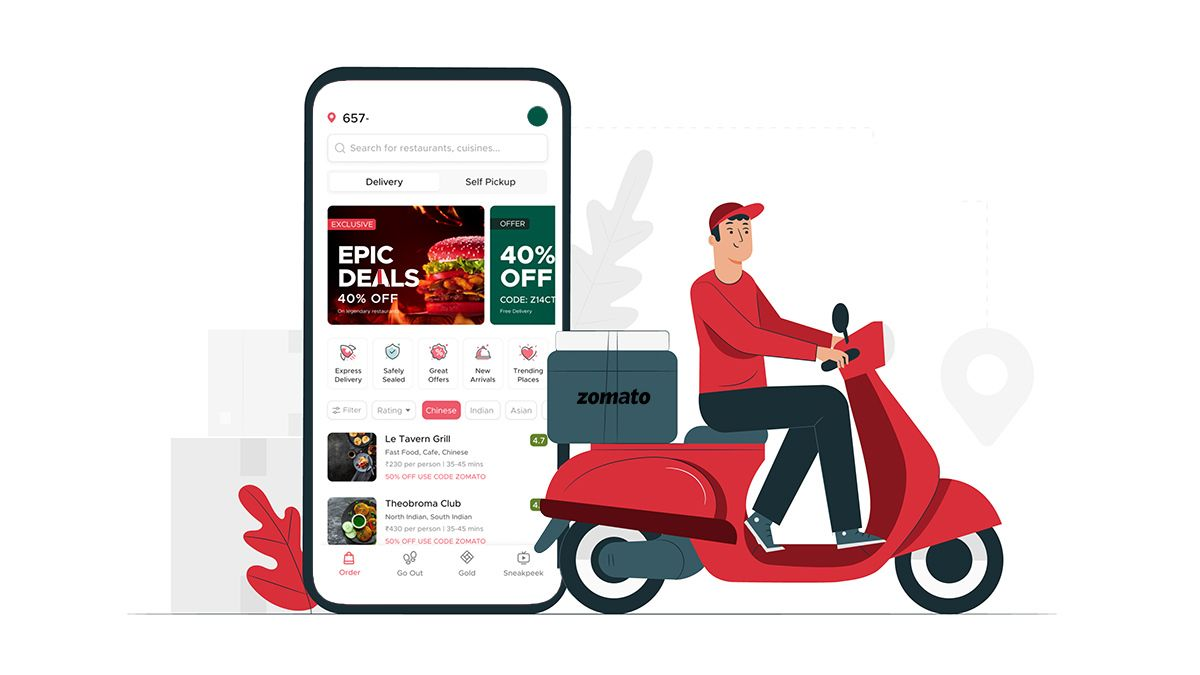

#**Problem Statement**

The objective of this project is to conduct sentiment analysis on customer reviews and derive insightful conclusions through visualizations. Additionally, the aim is to cluster Zomato restaurants into distinct segments. By utilizing data visualization techniques, the analysis facilitates quick and efficient data comprehension.

The project addresses several key business cases that directly benefit both customers and the company. It enables customers to discover the best restaurants in their locality, aiding in their decision-making process. For the company, the analysis serves as a means to identify areas of improvement and address existing shortcomings.

The dataset contains crucial information regarding cuisine and costing, which can be utilized in conducting a comprehensive cost vs. benefit analysis. Moreover, sentiment analysis techniques are employed to gauge the overall sentiment expressed within the reviews. Additionally, leveraging the metadata of reviewers allows for the identification of influential critics within the industry.

By effectively clustering restaurants, conducting sentiment analysis, and leveraging available data, this project aims to provide actionable insights that enhance customer experiences and aid the company's growth.


# ***Let's Begin !***
# **IMPORT THE NECESSARY LIBRARIES**

## ***1. Know Your Data***

In [ ]:
#importing required packages
import pandas as pd  # Importing the pandas library for data manipulation
import numpy as np
import matplotlib.pyplot as plt  # Importing the matplotlib library for data visualization
import seaborn as sns  # Importing the seaborn library for enhanced data visualization
%matplotlib inline
from wordcloud import WordCloud
import nltk  # Importing the Natural Language Toolkit (NLTK) for text processing
from nltk.corpus import stopwords  # Importing stopwords from NLTK
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer  # Importing CountVectorizer from scikit-learn
from sklearn.decomposition import LatentDirichletAllocation  # Importing LatentDirichletAllocation from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob
from IPython.display import Image
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

import warnings
warnings.filterwarnings('ignore')




# **Dataset Loading**

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading csv File
zomato_meta_df_main=pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project/5 capstone projects/Zomato Restaurant names and Metadata.csv")

In [ ]:
# Creating the copy of dataset.
zomato_meta_df = zomato_meta_df_main.copy()

In [ ]:
# Dataset First view.

zomato_meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
#look for bottom rows
zomato_meta_df.tail()

Name  \
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

              Collections                         Cuisines  \
100                   NaN                 Fast Food, Salad   
101                   NaN                   Bakery, Mithai   
102                   NaN   North Indian, Biryani, Chinese   
103                   NaN                        Fast Food   
104  Pan-Asian Delicacies  Thai, Asian, Chinese, Malaysian   

                                               Timings  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight

**Dataset rows and column count**

In [ ]:
# Dataset Rows & Columns count
print('There are total', zomato_meta_df.shape[0], 'Rows')
print('There are total', zomato_meta_df.shape[1], 'Columns')

There are total 105 Rows
There are total 6 Columns


**Dataset Information**

In [ ]:
# details of the features
zomato_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


**Gettting Statistical Information about our dataset**

In [ ]:
# brief summary of the dataset
zomato_meta_df.describe()

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

# **DATA CLEANING**

**In data cleaning we will check for**:

* **Duplicates**
* **Null values/NaN values**

# **Check Duplicates**

In [ ]:
# Check if there are any duplicate rows.
len(zomato_meta_df[zomato_meta_df.duplicated()])

0

In [ ]:
# Checking duplicate restaurant name.

zomato_meta_df['Name'].duplicated().sum()

0

In [ ]:
#Check the columns present in dataset
zomato_meta_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

# **Check Null values/NaN values**

In [ ]:
# Check if there are any null values.
zomato_meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
# This user define function will give the type,count of null and non null values as well as null ratio
def zomatometadfinfo():
  temp=pd.DataFrame(index=zomato_meta_df.columns)
  temp["datatype"]=zomato_meta_df.dtypes
  temp["not null values"]=zomato_meta_df.count()
  temp["null value"]=zomato_meta_df.isnull().sum()
  temp["% of the null value"]=zomato_meta_df.isnull().mean()
  temp["unique count"]=zomato_meta_df.nunique()
  return temp
zomatometadfinfo()

datatype  not null values  null value  % of the null value  \
Name          object              105           0             0.000000   
Links         object              105           0             0.000000   
Cost          object              105           0             0.000000   
Collections   object               51          54             0.514286   
Cuisines      object              105           0             0.000000   
Timings       object              104           1             0.009524   

             unique count  
Name                  105  
Links                 105  
Cost                   29  
Collections            42  
Cuisines               92  
Timings                77

In [ ]:
# Checking for Null values.

zomato_meta_df[zomato_meta_df['Collections'].isnull()].head()

Name  \
7   Shah Ghouse Spl Shawarma   
15                       KFC   
16       NorFest - The Dhaba   
17          Hotel Zara Hi-Fi   
23                      Amul   

                                                Links Cost Collections  \
7   https://www.zomato.com/hyderabad/shah-ghouse-s...  300         NaN   
15    https://www.zomato.com/hyderabad/kfc-gachibowli  500         NaN   
16  https://www.zomato.com/hyderabad/norfest-the-d...  550         NaN   
17  https://www.zomato.com/hyderabad/hotel-zara-ga...  400         NaN   
23   https://www.zomato.com/hyderabad/amul-gachibowli  150         NaN   

                 Cuisines                 Timings  
7                Lebanese  12 Noon to 12 Midnight  
15      Burger, Fast Food          11 AM to 11 PM  
16           North Indian     12 Noon to 10:30 PM  
17  Chinese, North Indian        11:30 AM to 1 AM  
23    Ice Cream, Desserts           10 AM to 5 AM

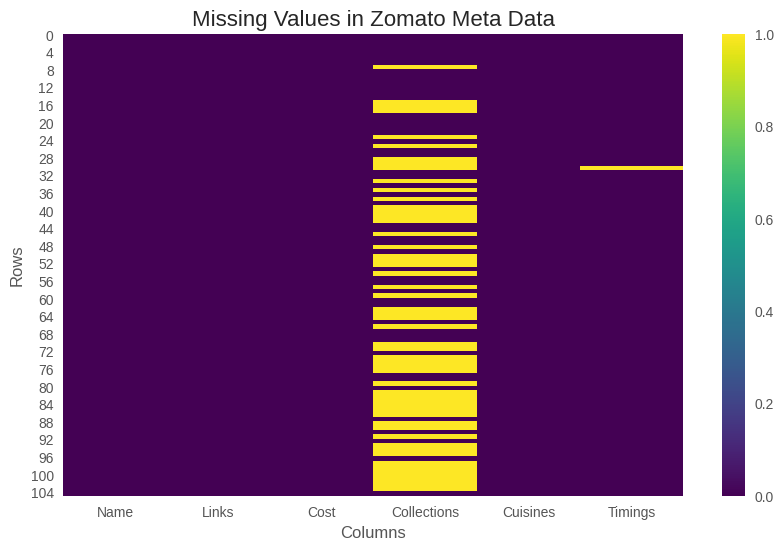

In [ ]:
import missingno as msno

# Visualize missing values with color
plt.figure(figsize=(10, 6))
sns.heatmap(zomato_meta_df.isnull(), cmap='viridis')
mask = zomato_meta_df.isnull()
plt.title('Missing Values in Zomato Meta Data', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.show()

**What did you know about your dataset?**

Our data has missing values in collection column. Since the column contains sentiments hence no need to impute the null values.

* There are 105 total observation with 6 different features.
* Feature like collection and timing has null values.
* There is no duplicate values i.e., 105 unique data.
* Feature cost represent amount but has object data type because these values are separated by comma ','.
* Timing represent operational hour but as it is represented in the form of text has object data type.

## ***2. Understanding Your Variables***

In [ ]:
#Check the columns present in Dataset
zomato_meta_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

## **Zomato Restaurant names and Metadata**

DATA DESCRIPTION FOR RESTAURANT INFORMATION

1. Name: The name of the restaurants.
2. Links: URL links to access detailed information about the restaurants.
3. Cost: Estimated cost per person for dining at the restaurants.
4. Collection: Restaurants are categorized and tagged according to Zomato categories, providing insights into their specialties.
5. Cuisines: The cuisines served by the restaurants, indicating the variety of food options available.
6. Timings: The operating hours or timings of the restaurants.

## **Zomato Restaurant reviews**

DATA DESCRIPTION FOR RESTAURANT REVIEWS

1. Restaurant: The name of the restaurant being reviewed.
2. Reviewer: The name of the person who provided the review.
3. Review: The text of the review shared by the reviewer.
4. Rating: The rating given by the reviewer to indicate their overall satisfaction with the restaurant.
5. Metadata: Additional information about the reviewer, such as the number of reviews they have posted and the number of followers they have.
6. Time: The date and time when the review was posted.
7. Pictures: The number of pictures posted along with the review, offering visual content related to the restaurant experience.

## 3. ***Data Wrangling***

In [ ]:
# Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'.

zomato_meta_df['Cost'] =  zomato_meta_df['Cost'].str.replace(",","").astype('int64')

**Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'**

In [ ]:
# Dataset Info.

zomato_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Chart - 1

In [ ]:
# Chart - 1 visualization code.

top10_res_by_cost = zomato_meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

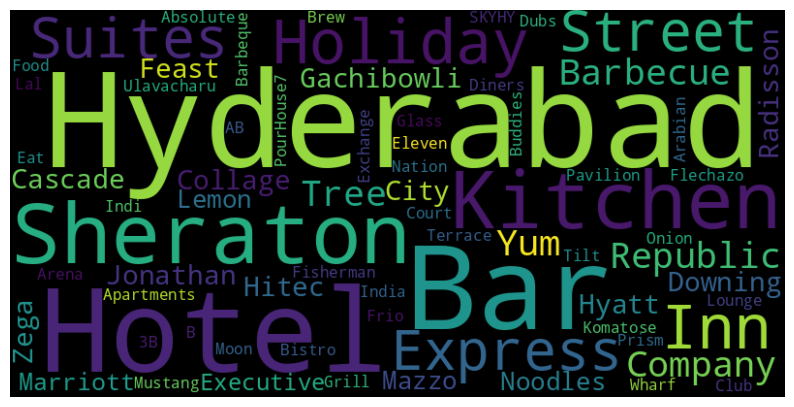

In [ ]:
# Creating word cloud for expensive restaurants.
plt.figure(figsize=(10,6))
text = " ".join(name for name in zomato_meta_df.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method.
word_cloud = WordCloud(width = 800, height = 400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud.
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off");

# **Visualisation of Words from 'Cuisines' features**

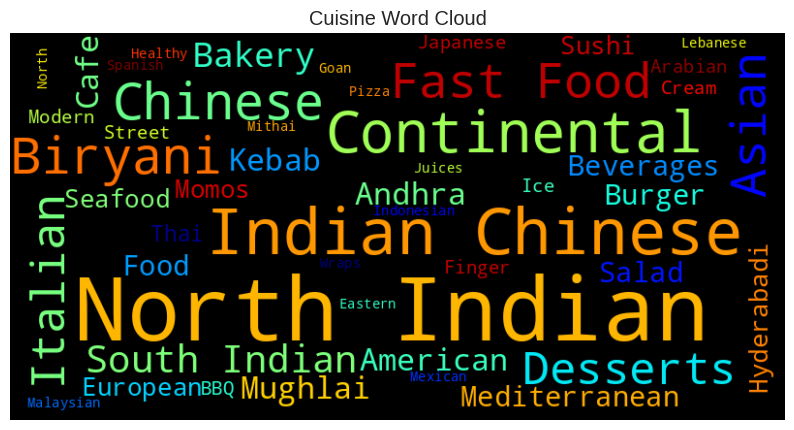

In [ ]:
# Extract the cuisine column
cuisine_text = ' '.join(zomato_meta_df['Cuisines'].dropna())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, colormap='jet',background_color='black').generate(cuisine_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Cuisine Word Cloud')
plt.show()

# **Most nominated words from 'Cuisines' features**

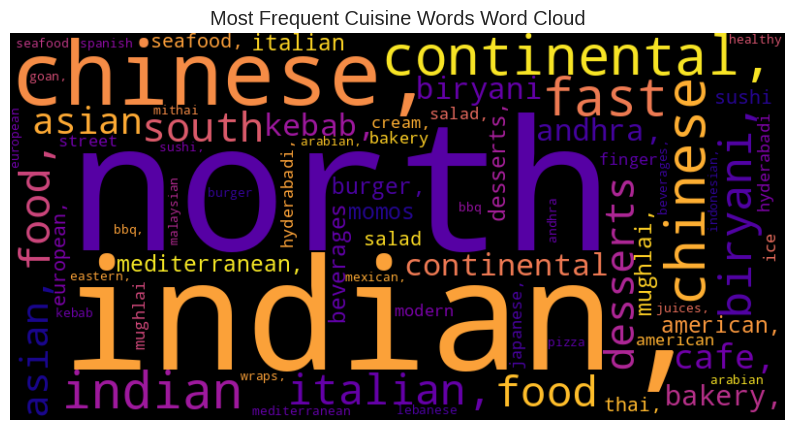

In [ ]:
# Extract the cuisine column and preprocess the text
cuisine_text = ' '.join(zomato_meta_df['Cuisines'].dropna().str.lower())

# Create a dictionary to count the frequency of each word
word_count = {}
for word in cuisine_text.split():
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

# Sort the dictionary by frequency in descending order
sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400,colormap='plasma', background_color='black').generate_from_frequencies(dict(sorted_word_count))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('oFF')
plt.title('Most Frequent Cuisine Words Word Cloud')
plt.show()

In [ ]:
# Assuming you have a dataframe 'restaurants_df' containing the Zomato restaurant data
# with a column named 'Cuisines' that contains the list of cuisines for each restaurant

# Splitting the cuisines into individual values and creating a new column 'CuisineList'
zomato_meta_df['CuisineList'] = zomato_meta_df['Cuisines'].str.split(',')

# Creating a new dataframe 'cuisine_count_df' to store the cuisine counts
cuisine_count_df = pd.DataFrame(columns=['Cuisine', 'Count'])

# Iterating through each row of the dataframe
for index, row in zomato_meta_df.iterrows():
    cuisine_list = row['CuisineList']

    # Iterating through each cuisine in the list
    for cuisine in cuisine_list:
        cuisine = cuisine.strip()

        # Checking if the cuisine is already in the 'cuisine_count_df'
        if cuisine in cuisine_count_df['Cuisine'].values:
            # Incrementing the count for the existing cuisine
            cuisine_count_df.loc[cuisine_count_df['Cuisine'] == cuisine, 'Count'] += 1
        else:
            # Adding a new cuisine to the 'cuisine_count_df' with count 1
            cuisine_count_df = cuisine_count_df.append({'Cuisine': cuisine, 'Count': 1}, ignore_index=True)

# Sorting the 'cuisine_count_df' based on count in descending order
cuisine_count_df = cuisine_count_df.sort_values(by='Count', ascending=False)

# Printing the cuisine count dataframe
print(cuisine_count_df)

          Cuisine Count
5    North Indian    61
0         Chinese    43
1     Continental    21
6         Biryani    16
18      Fast Food    15
7           Asian    15
20        Italian    14
9        Desserts    13
4    South Indian     9
29         Bakery     7
2           Kebab     6
33           Cafe     6
28         Andhra     6
27        Mughlai     6
15       American     6
24          Salad     5
22         Burger     5
8   Mediterranean     5
11      Beverages     5
39          Momos     4
10        Seafood     4
3        European     4
32     Hyderabadi     4
25          Sushi     4
36           Thai     3
38  Modern Indian     2
31        Arabian     2
16      Ice Cream     2
17    Street Food     2
23       Japanese     2
21    Finger Food     2
19            BBQ     2
40          Pizza     1
41  North Eastern     1
42         Mithai     1
37     Indonesian     1
30         Juices     1
35          Wraps     1
34        Spanish     1
26        Mexican     1
12           Goa

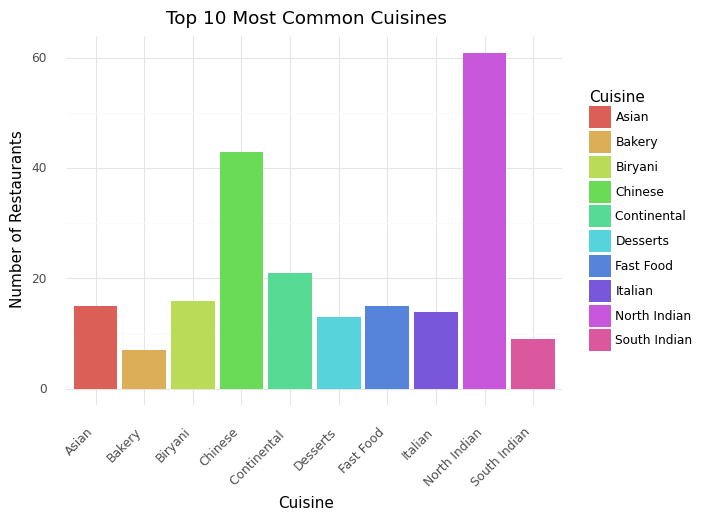

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

# List of cuisines and their respective counts
cuisine_counts = {
    'North Indian': 61,
    'Chinese': 43,
    'Continental ': 21,
    'Biryani': 16,
    'Fast Food': 15,
    'Asian': 15,
    'Italian': 14,
    'Desserts': 13,
    'South Indian':9,
    'Bakery':7
}

# Convert cuisine_counts into a dataframe
df = pd.DataFrame(list(cuisine_counts.items()), columns=['Cuisine', 'Count'])

# Sort dataframe based on counts in descending order
df = df.sort_values(by='Count', ascending=False).head(10)

# Create a bar plot with ggplot and geom_bar
plot = (
    ggplot(data=df, mapping=aes(x='Cuisine', y='Count', fill='Cuisine')) +
    geom_bar(stat='identity') +
    theme_minimal() +
    labs(x='Cuisine', y='Number of Restaurants', title='Top 10 Most Common Cuisines') +
    theme(axis_text_x=element_text(rotation=45, ha='right'))
)

# Display the plot
print(plot)

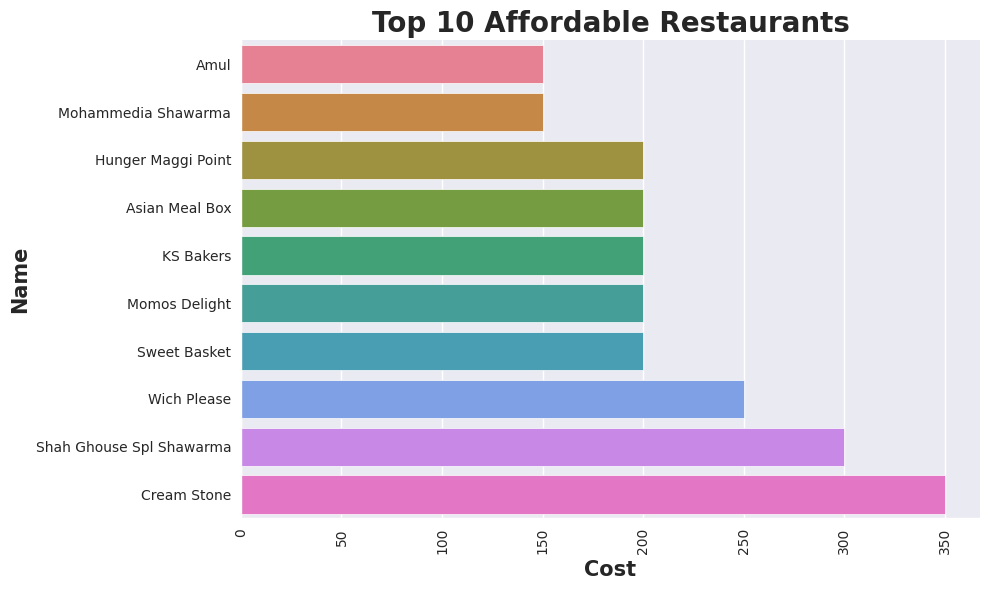

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called 'zomato_meta_df' with columns 'Name' and 'Cost'
top_10_affor_rest = zomato_meta_df.nsmallest(10, 'Cost')  # Get the top 10 affordable restaurants based on 'Cost'

plt.figure(figsize=(10, 6))

# Customizing the color palette
colors = sns.color_palette("husl", n_colors=len(top_10_affor_rest))

# Applying the ggplot style
sns.set_style("darkgrid")

# Plotting the bar chart
ax = sns.barplot(x='Cost', y='Name', data=top_10_affor_rest, palette=colors)

# Setting the title and labels
plt.title("Top 10 Affordable Restaurants", fontsize=20, weight='bold')
plt.xlabel("Cost", fontsize=15, weight='bold')
plt.ylabel("Name", fontsize=15, weight='bold')

# Beautifying the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks(rotation=90)
plt.tight_layout()

# Displaying the plot
plt.show()

The plot shows the top 10 affordable restaurants
based on their total cost. The y-axis represents the restaurant names, while the x-axis shows the total cost. The affordable restaurants are sorted in ascending order of their cost.

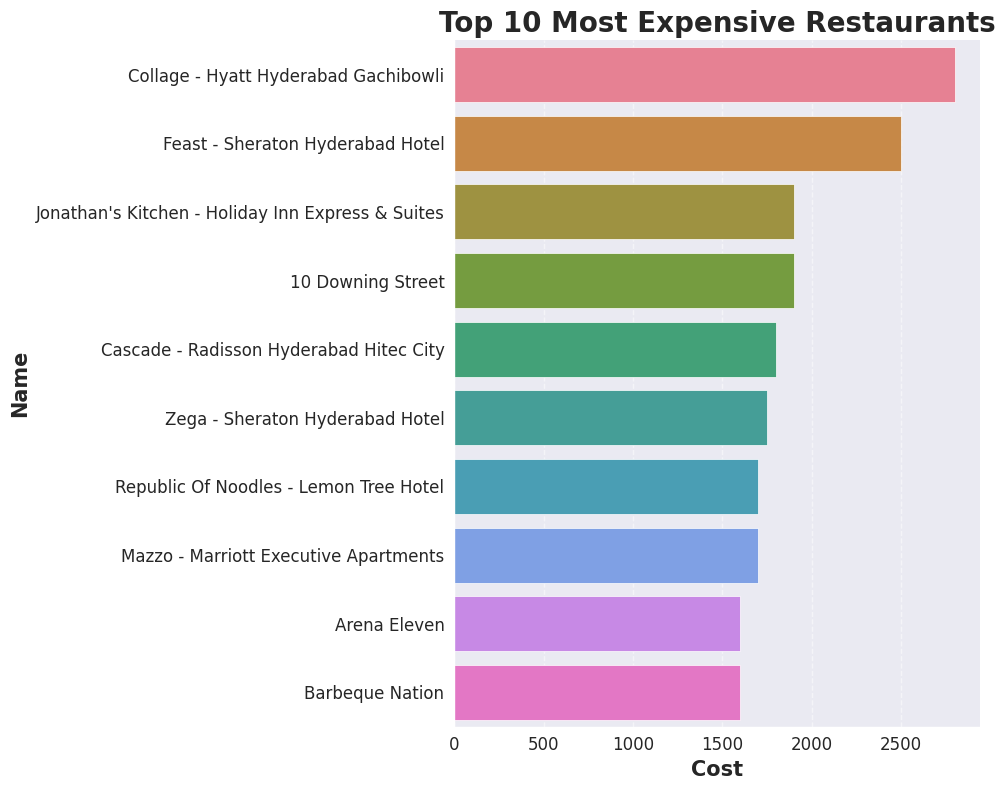

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Assuming you have a DataFrame called 'meta_df' with 'Name' and 'Cost' columns

# Sorting the DataFrame by 'Cost' in descending order and selecting the top 10
top_10_expensive = zomato_meta_df.sort_values(by='Cost', ascending=False).head(10)

# Customizing the color palette
colors = sns.color_palette("husl", n_colors=len(top_10_expensive))

# Plotting the bar chart
sns.barplot(x='Cost', y='Name', data=top_10_expensive, palette=colors)

# Setting the title and labels
plt.title("Top 10 Most Expensive Restaurants", fontsize=20, weight='bold')
plt.xlabel("Cost", fontsize=15, weight='bold')
plt.ylabel("Name", fontsize=15, weight='bold')

# Beautifying the plot
sns.despine()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()

# Displaying the plot
plt.show()

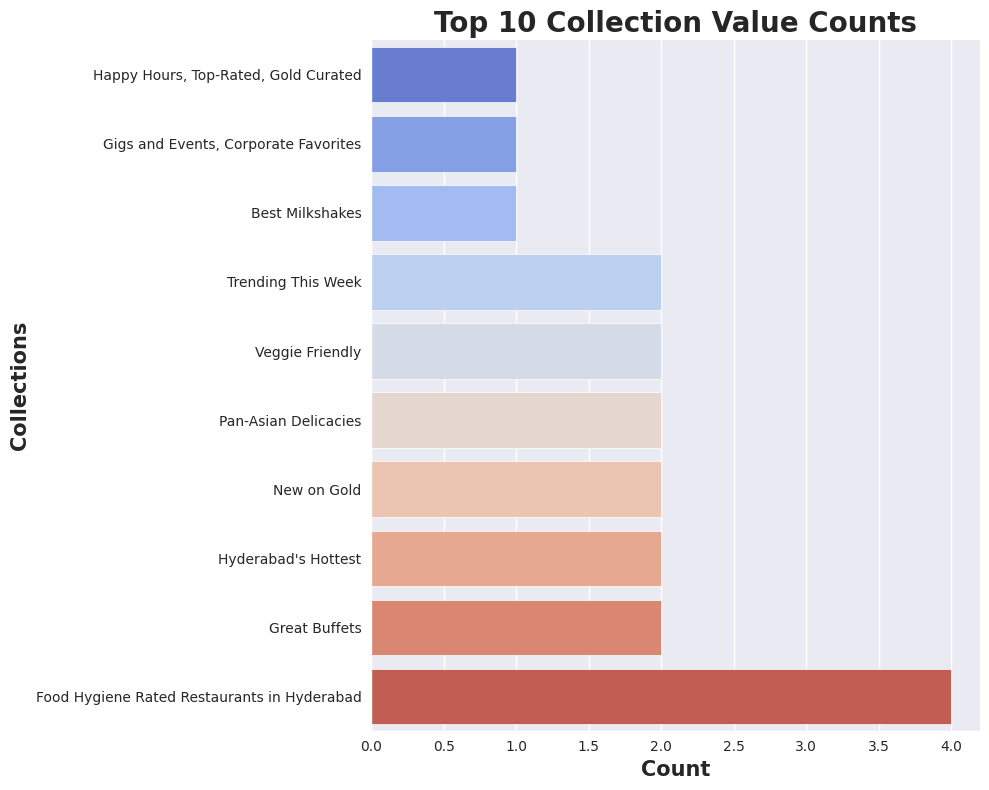

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Assuming you have a DataFrame called 'meta_df' with a 'Collections' column
collection_counts = zomato_meta_df['Collections'].value_counts().sort_values(ascending=True)[-10:]

# Customizing the color palette
colors = sns.color_palette("coolwarm", n_colors=len(collection_counts))

# Plotting the horizontal bar chart
ax = sns.barplot(x=collection_counts.values, y=collection_counts.index, palette=colors)

# Setting the title and labels
plt.title("Top 10 Collection Value Counts", fontsize=20, weight='bold')
plt.xlabel("Count", fontsize=15, weight='bold')
plt.ylabel("Collections", fontsize=15, weight='bold')

# Beautifying the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.tight_layout()

# Displaying the plot
plt.show()

The resulting bar chart shows the top 10 most frequent values in the Collections column on the y-axis and their corresponding counts on the x-axis.
The horizontal orientation of the bars makes it easy to compare the counts of the different collections. The longer the bar, the higher the count.

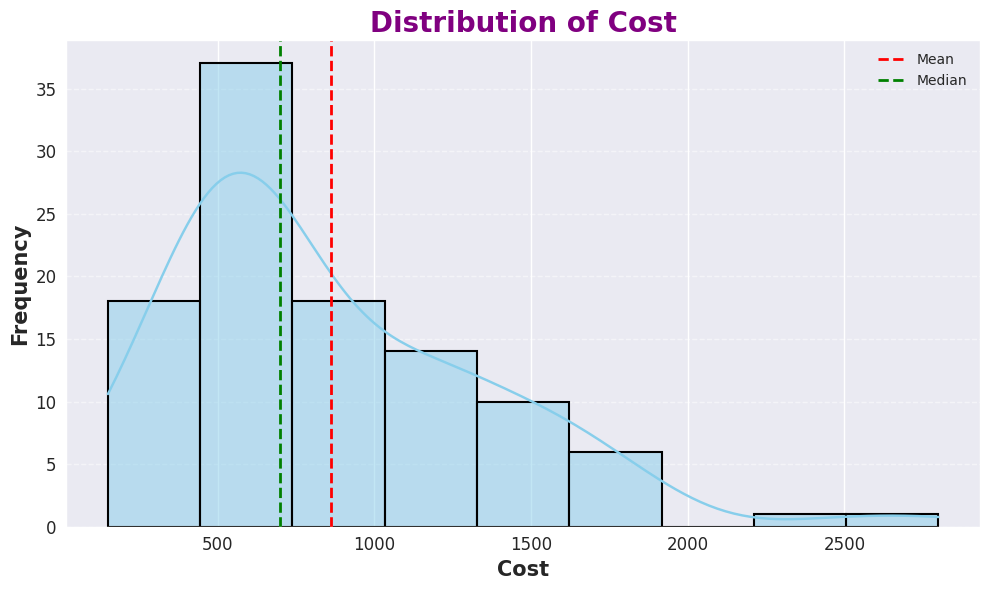

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Assuming you have a DataFrame called 'zomato_meta_df' with a 'Cost' column
sns.histplot(zomato_meta_df['Cost'], kde=True, color='skyblue', edgecolor='black', linewidth=1.5)

# Calculate mean and median values
mean_cost = zomato_meta_df['Cost'].mean()
median_cost = zomato_meta_df['Cost'].median()

# Setting the title and labels
plt.title("Distribution of Cost", fontsize=20, weight='bold', color='purple')
plt.xlabel("Cost", fontsize=15, weight='bold')
plt.ylabel("Frequency", fontsize=15, weight='bold')

# Add vertical lines for mean and median values
plt.axvline(mean_cost, color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(median_cost, color='green', linestyle='--', linewidth=2, label='Median')

# Beautifying the plot
sns.set_style("whitegrid")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()

# Displaying the plot
plt.show()

In [ ]:
avg_cost = pd.DataFrame(zomato_meta_df.groupby(zomato_meta_df['Name']).agg({'Cost':'mean'})).reset_index()
avg_cost.sort_values(by = 'Cost',ascending = False,inplace= True)
avg_cost.head()

Name    Cost
23               Collage - Hyatt Hyderabad Gachibowli  2800.0
35                   Feast - Sheraton Hyderabad Hotel  2500.0
0                                   10 Downing Street  1900.0
48  Jonathan's Kitchen - Holiday Inn Express & Suites  1900.0
20            Cascade - Radisson Hyderabad Hitec City  1800.0

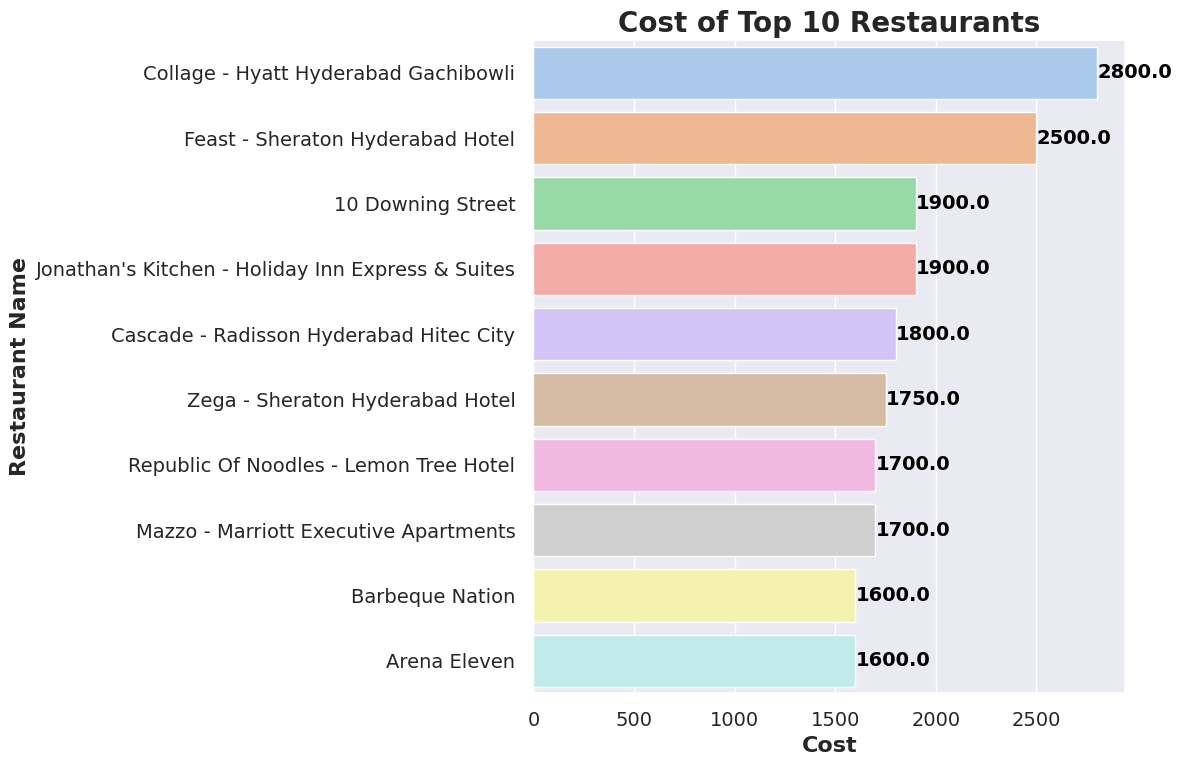

In [ ]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
colors = sns.color_palette('pastel')[0:10]

ax = sns.barplot(data=avg_cost[:10], x='Cost', y='Name', palette=colors)
plt.title('Cost of Top 10 Restaurants', fontweight='bold', fontsize=20)
plt.xlabel('Cost', fontsize=16, fontweight='bold')
plt.ylabel('Restaurant Name', fontsize=16, fontweight='bold')

# Add value labels to the bars
for i, v in enumerate(avg_cost['Cost'][:10]):
    ax.text(v + 2, i, str(v), color='black', fontweight='bold', fontsize=14, va='center')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:

# Tokenizer
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words="MAX_NB_WORDS")
tokenizer.fit_on_texts(zomato_meta_df[['Cuisines','Links','Timings']])


import re, string, unicodedata
import nltk
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer


zomato_meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  \
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)   
1                                     11 AM to 11 PM   
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM   
3                                    12 Noon to 2 AM   
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...   

                                         CuisineList  
0  [Chinese,  Continental,  Kebab,  European,  So...  
1                 [Biryani,  North Indian,  Chinese]  
2  [Asian,  Mediterranean,  North Indian,  Desserts]  
3  [Biryani,  North Indian,  Chinese,  Seafood,  ...  
4  [Asian,  Continental,  North Indian,  Chinese,...

In [ ]:
zomato_meta_df['Cuisines']= zomato_meta_df['Cuisines'].astype(str)

In [ ]:

# Functions
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
      word = str(word)
      new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
      new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    return words

In [ ]:
# Applying functions
col_lsts = ['Links','Cuisines','Timings']
for col_lst in col_lsts:
  zomato_meta_df[col_lst] = normalize(zomato_meta_df[col_lst])

In [ ]:

zomato_meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  httpswwwzomatocomhyderabadbeyondflavoursgachib...   800   
1       httpswwwzomatocomhyderabadparadisegachibowli   800   
2       httpswwwzomatocomhyderabadflechazogachibowli  1300   
3  httpswwwzomatocomhyderabadshahghousehotelresta...   800   
4  httpswwwzomatocomhyderabadoverthemoonbrewcompa...  1200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  chinese continental kebab european south india...   
1                       biryani north indian chinese   
2          asian mediterranean north indian desserts   
3     biryani north indian chinese seafood beverages   
4  asian continental north indian chinese mediter...   

                                             Timings  \
0             12noon to 330pm 630pm to 1130pm monsun   
1                                     11 am to 11 pm   
2                  1130 am to 430 pm 630 pm to 11 pm   
3                                    12 noon to 2 am   
4  12noon to 11pm mon tue wed thu sun 12noon to 1...   

                                         CuisineList  
0  [Chinese,  Continental,  Kebab,  European,  So...  
1                 [Biryani,  North Indian,  Chinese]  
2  [Asian,  Mediterranean,  North Indian,  Desserts]  
3  [Biryani,  North Indian,  Chinese,  Seafood,  ...  
4  [Asian,  Continental,  North Indian,  Chinese,...

Preprocessing the dataset for Clustering models

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# Tfidf vectorizer
vectorizer = TfidfVectorizer(stop_words= 'english')
X = vectorizer.fit_transform(zomato_meta_df['Cuisines'])

In [ ]:
X.shape

(105, 47)

In [ ]:
# Type of X object
type(X)

scipy.sparse._csr.csr_matrix

In [ ]:
# Converting 'X' object to array
X = X.toarray()

In [ ]:
type(X)

numpy.ndarray

# Elbow method to find appropriate 'K' value

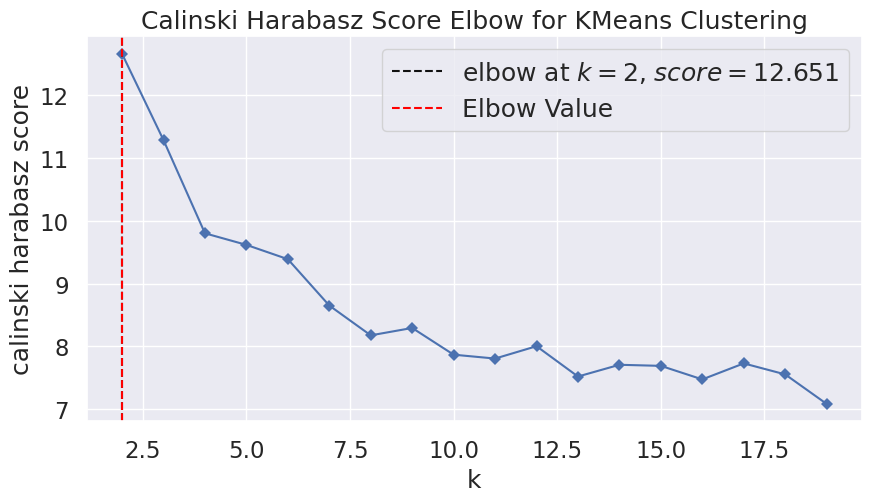

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

def KElbowvisualizer(X, metric):
    model = KMeans(max_iter=300, random_state=0)
    plt.figure(figsize=(10, 5))
    sns.set_style('darkgrid')

    # Custom color palette using 'husl'
    colors = sns.color_palette('husl', 20)

    visualizer = KElbowVisualizer(model, k=(2, 20), metric=metric, timings=False, locate_elbow=True, colors=colors, line_color='darkorange')
    visualizer.fit(X)

    # Set the line on the rightmost k value
    ax = visualizer.ax
    ax.axvline(x=visualizer.elbow_value_, color='red', linestyle='--', label='Elbow Value')

    visualizer.poof()

# Assuming you have your data stored in the 'X' variable
KElbowvisualizer(X, 'calinski_harabasz')

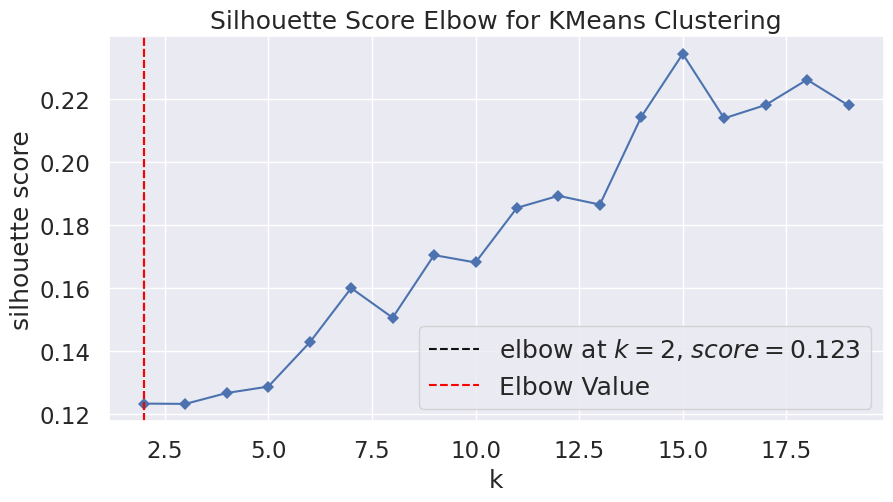

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

def KElbowvisualizer(X):
    model = KMeans(max_iter=300, random_state=0)
    plt.figure(figsize=(10, 5))
    sns.set_style('darkgrid')

    # Custom color palette using 'husl'
    colors = sns.color_palette('husl', 20)

    visualizer = KElbowVisualizer(model, k=(2, 20), metric='silhouette', timings=False, locate_elbow=True, colors=colors, line_color='darkorange')
    visualizer.fit(X)

    # Set the line on the rightmost k value
    ax = visualizer.ax
    ax.axvline(x=visualizer.elbow_value_, color='red', linestyle='--', label='Elbow Value')

    visualizer.poof()

# Assuming you have your data stored in the 'X' variable
KElbowvisualizer(X)

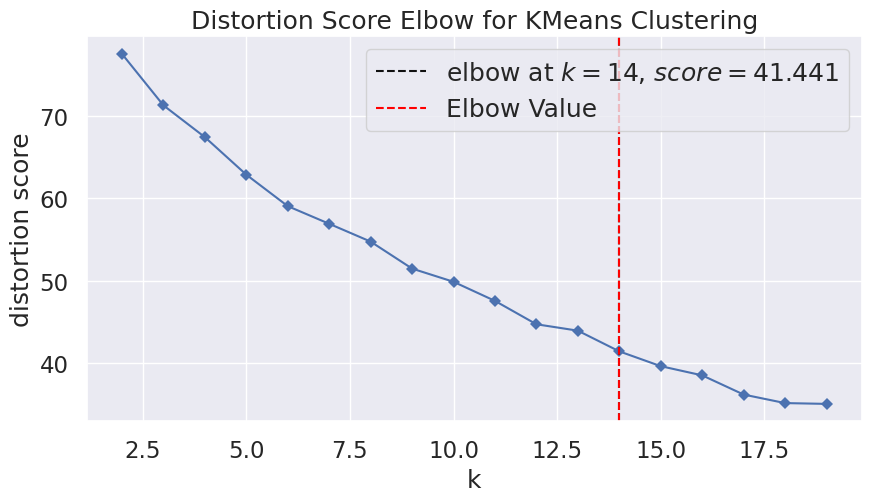

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

def KElbowvisualizer(X):
    model = KMeans(max_iter=300, random_state=0)
    plt.figure(figsize=(10, 5))
    sns.set_style('darkgrid')

    # Custom color palette using 'husl'
    colors = sns.color_palette('husl', 20)

    visualizer = KElbowVisualizer(model, k=(2, 20), metric='distortion', timings=False, locate_elbow=True, colors=colors, line_color='darkorange')
    visualizer.fit(X)

    # Set the line on the rightmost k value
    ax = visualizer.ax
    ax.axvline(x=visualizer.elbow_value_, color='red', linestyle='--', label='Elbow Value')

    visualizer.poof()

# Assuming you have your data stored in the 'X' variable
KElbowvisualizer(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
silhouette_cluster_values = {}

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    silhouette_cluster_values[n_clusters] = silhouette_avg

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Draw vertical line for average silhouette score
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Clear y-axis labels/ticks and set x-axis ticks
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Scatter plot of the clustered data
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30,lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
silhouette_avg

0.25298907123683173

For n_clusters = 2 The average silhouette_score is: 0.3720971730425887
For n_clusters = 3 The average silhouette_score is: 0.4345687480239338
For n_clusters = 4 The average silhouette_score is: 0.46451447287041026
For n_clusters = 5 The average silhouette_score is: 0.4594822272227944
For n_clusters = 6 The average silhouette_score is: 0.4544476278282685
For n_clusters = 7 The average silhouette_score is: 0.4361167902065374
For n_clusters = 8 The average silhouette_score is: 0.43835570399949453
For n_clusters = 9 The average silhouette_score is: 0.41357228523397427
For n_clusters = 10 The average silhouette_score is: 0.39720444352696205
For n_clusters = 11 The average silhouette_score is: 0.42867414795153536
For n_clusters = 12 The average silhouette_score is: 0.42895796300077477
For n_clusters = 13 The average silhouette_score is: 0.4478650406688538
For n_clusters = 14 The average silhouette_score is: 0.44863969033672924
For n_clusters = 15 The average silhouette_score is: 0.4338522084

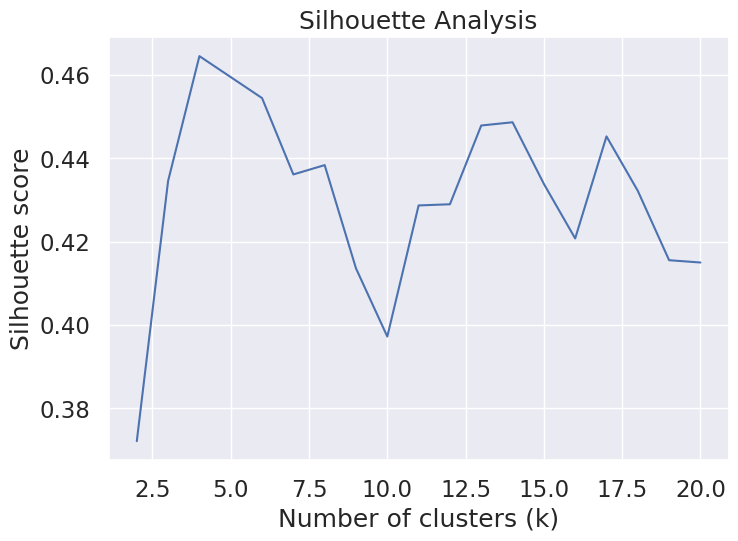

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data (replace this with your own data)
X = np.random.rand(100, 2)

def silhouette_analysis(X, range_n_clusters):
    silhouette_scores = []

    for n_clusters in range_n_clusters:
        # Initialize KMeans clustering algorithm
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # Compute the silhouette score
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

        silhouette_scores.append(silhouette_avg)

    # Plot the silhouette scores
    plt.plot(range_n_clusters, silhouette_scores)
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette score")
    plt.title("Silhouette Analysis")
    plt.show()

    # Return the silhouette scores
    return silhouette_scores

# Define the range of cluster numbers to consider
range_n_clusters = range(2, 21)

# Call the silhouette analysis function
silhouette_scores = silhouette_analysis(X, range_n_clusters)

# **From the above graph we can take k = 15 as optimum value of silhouette score, as compared to Elbow method also we found k=15 as best value.**

In [ ]:
# looks like we can go with 14 clusters.
# Creating an object for K Means clustering
kmeans= KMeans(n_clusters=15, init= 'k-means++',max_iter=300, n_init=1,random_state = 0)
# MOdel fit
kmeans.fit(X)
#predict the labels of clusters.
labels = kmeans.fit_predict(X)
# Clusters center
clusters_center = kmeans.cluster_centers_
[zomato_meta_df['Cuisines'][15]]

['burger fast food']

In [ ]:
# Testing
X_new= vectorizer.transform([zomato_meta_df['Cuisines'][15]])
y_pred_new= kmeans.predict(X_new)[0]
y_pred_new

ValueError: ignored

In [ ]:
# Testing
X_new= vectorizer.transform([zomato_meta_df['Cuisines'][15]])
y_pred_new= kmeans.predict(X_new)[0]
y_pred_new
# Model Validation
# silhouette score of my clusters
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, kmeans.labels_))
# Creating new feature to store labels
zomato_meta_df['Kmeans_labels'] = kmeans.labels_
# Creating a DataFrame for KMeans Labels visualization
Kmeans_labels_count = pd.DataFrame(zomato_meta_df.groupby(['Kmeans_labels'])['Cuisines'].count()).reset_index()
Kmeans_labels_count.head()
zomato_meta_df.columns
def labelsnobs(dataframe,x_value,y_value,palette_type,title,y_label):
  plt.figure(figsize = (20, 8))
  sns.set(font_scale = 2)
  sns.barplot(data = dataframe,x = x_value,y = y_value,palette=palette_type)
  plt.title(title,fontweight='bold')
  plt.ylabel(y_label)
  plt.xticks(rotation = 90,fontsize = 14)
  plt.yticks(fontsize = 18)
  plt.show()
  # Visualization of Labels with n number of observations
labelsnobs(Kmeans_labels_count,Kmeans_labels_count['Kmeans_labels'],Kmeans_labels_count['Cuisines'],['#581845','#900C3F','C70039','#FF5733'],
           'labels with n number of observation', 'Observations')
# Getting terms
terms = vectorizer.get_feature_names()
# Grouping 'Kmeans_labels' and 'Name' feature
Kmeans_labels_name = pd.DataFrame(zomato_meta_df.groupby(['Kmeans_labels'])['Name'],columns = ['KMeans_Cluster_labels','Restaurants'])
Kmeans_labels_name.set_index('KMeans_Cluster_labels', inplace=True)
# Reataurant names with respect to each clusters
for i in range(0,15):
  num = str(i)
  print('Cluster:'+ num)
  print(Kmeans_labels_name['Restaurants'][i])
zomato_meta_df.head(1)
#dataframe for creating scatter plot of all cluster of k-means
df_k = zomato_meta_df
df_k = df_k.assign(Cuisines=df_k['Cuisines'].str.split(' ')).explode('Cuisines').reindex(df_k.columns, axis=1)
df_k.head()
fig = px.scatter(df_k, x="Cuisines", y="Name", color="Kmeans_labels", size='Cost', width=1500, height=800)
fig.show()

ValueError: ignored

In [ ]:
# looks like we can go with 14 clusters.
# Creating an object for K Means clustering
kmeans= KMeans(n_clusters=15, init= 'k-means++',max_iter=300, n_init=1,random_state = 0)

In [ ]:
# MOdel fit
kmeans.fit(X)

KMeans(n_clusters=15, n_init=1, random_state=0)

In [ ]:

#predict the labels of clusters.
labels = kmeans.fit_predict(X)

In [ ]:
# Clusters center
clusters_center = kmeans.cluster_centers_

In [ ]:
[zomato_meta_df['Cuisines'][15]]

['burger fast food']

In [ ]:

# Model Validation
# silhouette score of my clusters
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, kmeans.labels_))

In [ ]:
# Creating new feature to store labels
zomato_meta_df['Kmeans_labels'] = kmeans.labels_


In [ ]:
# Creating a DataFrame for KMeans Labels visualization
Kmeans_labels_count = pd.DataFrame(zomato_meta_df.groupby(['Kmeans_labels'])['Cuisines'].count()).reset_index()


In [ ]:
Kmeans_labels_count.head()

In [ ]:

zomato_meta_df.columns


In [ ]:
def labelsnobs(dataframe,x_value,y_value,palette_type,title,y_label):
  plt.figure(figsize = (20, 8))
  sns.set(font_scale = 2)
  sns.barplot(data = dataframe,x = x_value,y = y_value,palette=palette_type)
  plt.title(title,fontweight='bold')
  plt.ylabel(y_label)
  plt.xticks(rotation = 90,fontsize = 14)
  plt.yticks(fontsize = 18)
  plt.show()

In [ ]:
# Visualization of Labels with n number of observations
labelsnobs(Kmeans_labels_count,Kmeans_labels_count['Kmeans_labels'],Kmeans_labels_count['Cuisines'],['#581845','#900C3F','C70039','#FF5733'],
           'labels with n number of observation', 'Observations')

In [ ]:
# Getting terms
terms = vectorizer.get_feature_names()

In [ ]:
# Grouping 'Kmeans_labels' and 'Name' feature
Kmeans_labels_name = pd.DataFrame(zomato_meta_df.groupby(['Kmeans_labels'])['Name'],columns = ['KMeans_Cluster_labels','Restaurants'])
Kmeans_labels_name.set_index('KMeans_Cluster_labels', inplace=True)

In [ ]:

# Reataurant names with respect to each clusters
for i in range(0,15):
  num = str(i)
  print('Cluster:'+ num)
  print(Kmeans_labels_name['Restaurants'][i])

In [ ]:

zomato_meta_df.head(1)

In [ ]:

#dataframe for creating scatter plot of all cluster of k-means
df_k = zomato_meta_df
df_k = df_k.assign(Cuisines=df_k['Cuisines'].str.split(' ')).explode('Cuisines').reindex(df_k.columns, axis=1)
df_k.head()

In [ ]:
fig = px.scatter(df_k, x="Cuisines", y="Name", color="Kmeans_labels", size='Cost', width=1500, height=800)
fig.show()

# **Agglomerative Clustering**

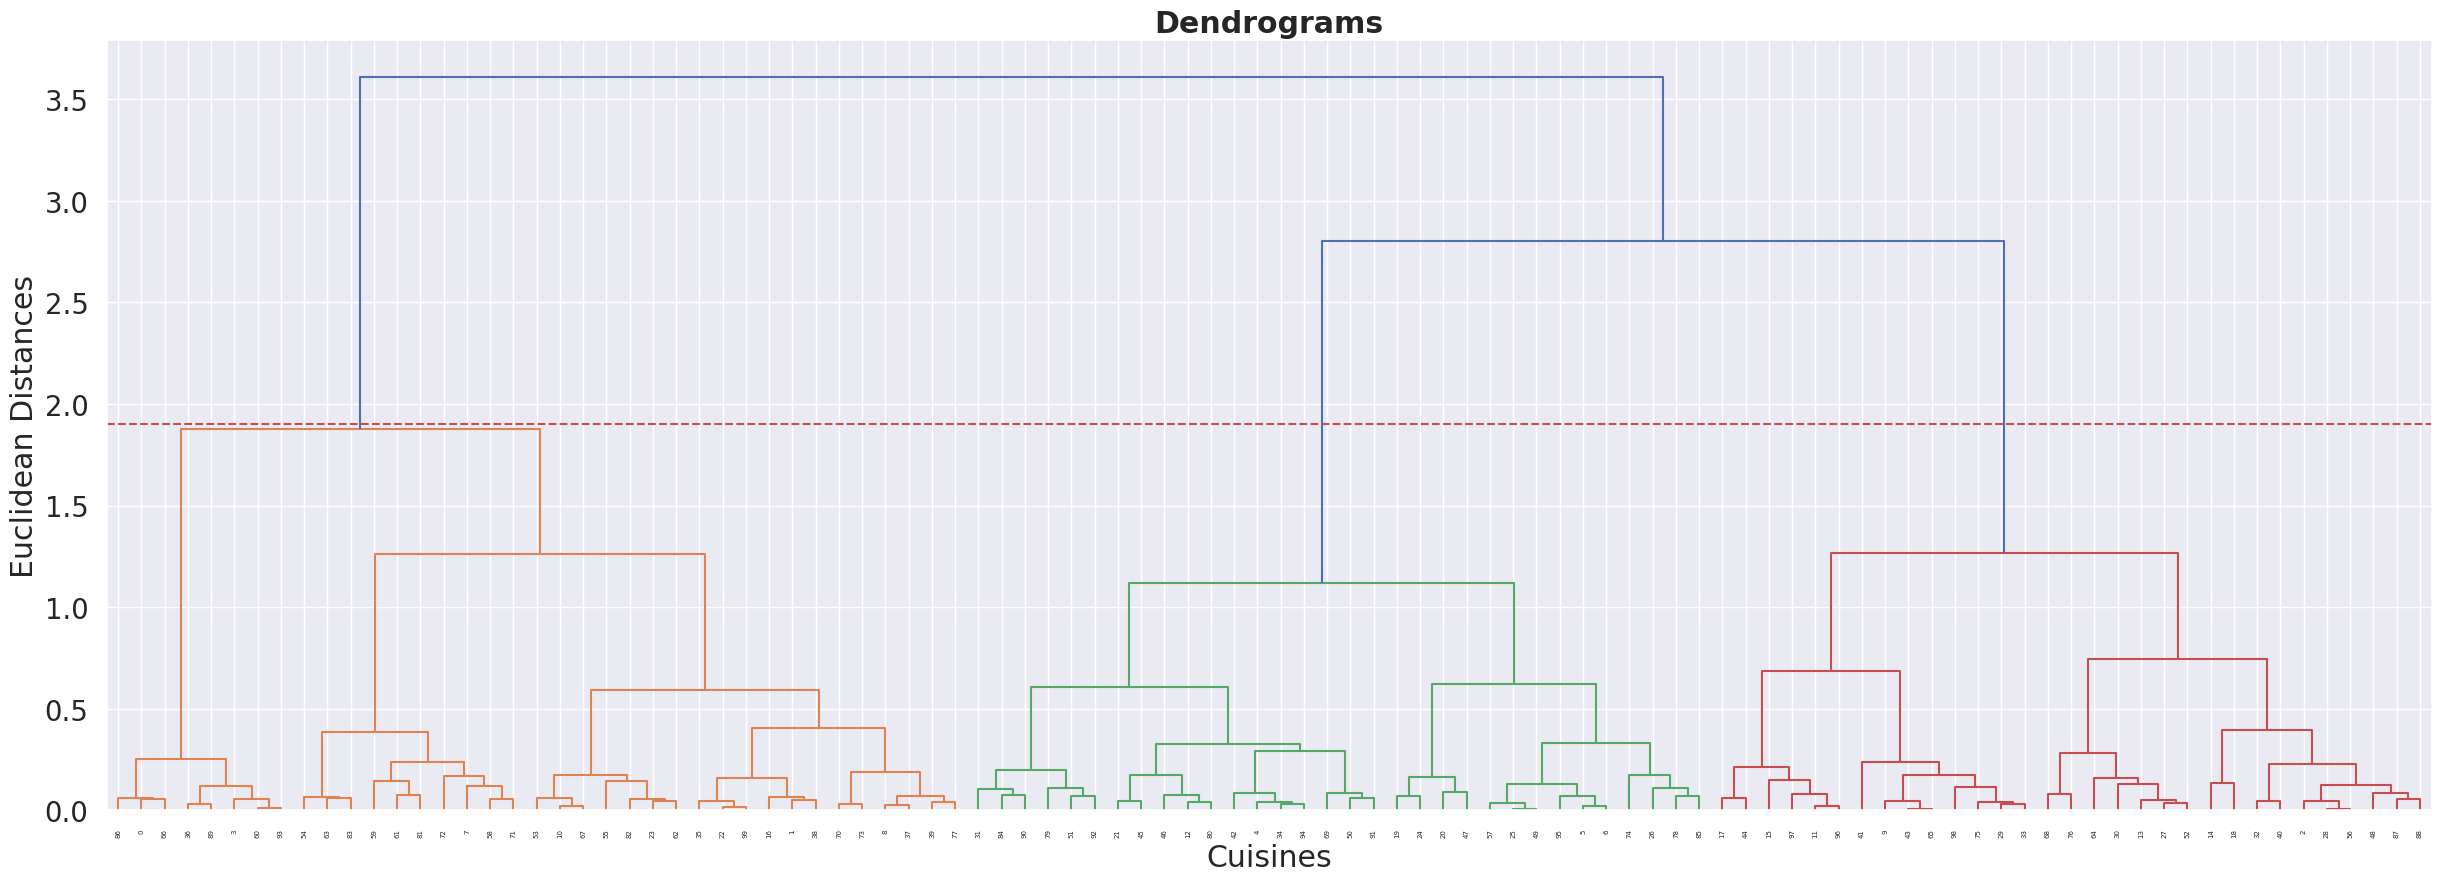

In [ ]:
import inflect
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering for 'Cuisine' feature
plt.figure(figsize=(30, 10))
sns.set(font_scale=1.8)
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrograms', fontweight='bold')
plt.xlabel('Cuisines')
plt.ylabel('Euclidean Distances')
plt.axhline(y=1.9, color='r', linestyle='--')
plt.show()

In [ ]:
# To choose appropriate K value

for k in range(2,21):
  aggh = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
  aggh.fit(X)
  y_hc=aggh.fit_predict(X)
  print("For n_clusters =", k, "The average silhouette_score is :", round(silhouette_score(X, y_hc),5))

For n_clusters = 2 The average silhouette_score is : 0.36997
For n_clusters = 3 The average silhouette_score is : 0.42004
For n_clusters = 4 The average silhouette_score is : 0.43947
For n_clusters = 5 The average silhouette_score is : 0.42744
For n_clusters = 6 The average silhouette_score is : 0.43281
For n_clusters = 7 The average silhouette_score is : 0.42144
For n_clusters = 8 The average silhouette_score is : 0.42669
For n_clusters = 9 The average silhouette_score is : 0.43744
For n_clusters = 10 The average silhouette_score is : 0.43852
For n_clusters = 11 The average silhouette_score is : 0.43937
For n_clusters = 12 The average silhouette_score is : 0.44473
For n_clusters = 13 The average silhouette_score is : 0.45248
For n_clusters = 14 The average silhouette_score is : 0.45217
For n_clusters = 15 The average silhouette_score is : 0.44987
For n_clusters = 16 The average silhouette_score is : 0.44146
For n_clusters = 17 The average silhouette_score is : 0.44315
For n_clusters =

In [ ]:

# Creating an object for AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='ward')

In [ ]:

# Fitting the model
aggh.fit(X)

AgglomerativeClustering(affinity='euclidean', n_clusters=15)

In [ ]:
# Label Prediction
y_hc=aggh.fit_predict(X)

In [ ]:
# Labels
print(y_hc)

[ 3 12  6  3  2  0  0  5  7  4 11  8  2  1 13  8 12  8 13  9  9  2 12 11
  9  0  0  1  6  4  1 10  6  4  2 12  3  7 12  7  6  4  2  4  8  2  2  9
  6  0  2 10  1 11 14 11  6  0  5  5  3  5 11 14  1  4  3 11  1  2  7  5
  5  7  0  4  1  7  0 10  2  5 11 14 10  0  3  6  6  3 10  2 10  3  2  0
  8  8  4 12]


In [ ]:

# Creating new feature to store labels
zomato_meta_df['Agglomerative_labels'] = aggh.labels_

ValueError: ignored

In [ ]:
# Creating a DataFrame for KMeans Labels visualization
Agglomerative_labels_count = pd.DataFrame(df_name.groupby(['Agglomerative_labels'])['Cuisines'].count()).reset_index()

In [ ]:

# Visualization of Labels with n number of observations
labelsnobs(Agglomerative_labels_count,Agglomerative_labels_count['Agglomerative_labels'],Agglomerative_labels_count['Cuisines'],['#581845','#900C3F','C70039','#FF5733'],
           'labels with n number of observation', 'Observations')

In [ ]:
# Grouping 'Kmeans_labels' and 'Name' feature
Agglomerative_labels_name = pd.DataFrame(zomato_meta_df.groupby(['Agglomerative_labels'])['Name'],columns = ['Agglomerative_labels','Restaurants'])
Agglomerative_labels_name.set_index('Agglomerative_labels', inplace=True)

In [ ]:
zomato_meta_df.head(1)

In [ ]:
zomato_meta_df.columns

In [ ]:
#dataframe for creating scatter plot of all cluster of Agglomerative cluster
df_agg = zomato_meta_df
df_agg = df_agg.assign(Cuisines=df_agg['Cuisines'].str.split(' ')).explode('Cuisines').reindex(df_agg.columns, axis=1)

In [ ]:
#plotting
fig = px.scatter(df_agg, x="Cuisines", y="Name", color="Agglomerative_labels", size='Cost', width=1500, height=800)
fig.show()

In [ ]:
# Downloading and importing the dependancies for text cleaning.
import nltk
from nltk.corpus import stopwords

# Download stopwords data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Extracting the stopwords from nltk library for English corpus.
sw = stopwords.words('english')

In [ ]:
# Creating a function for removing stopwords.
def stopwords(text):
    '''a function for removing the stopword'''

    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in str(text).split() if word.lower() not in sw]

    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stopwords from Cuisines.
zomato_meta_df['Cuisines'] = zomato_meta_df['Cuisines'].apply(lambda text: stopwords(text))
zomato_meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

Stop words are removed successfully

In [ ]:
# Defining the function for removing punctuation.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string

    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)

    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation from Cuisines.
zomato_meta_df['Cuisines'] = zomato_meta_df['Cuisines'].apply(lambda x: remove_punctuation(x))
zomato_meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

Punctuations present in the text are removed successfully

In [ ]:
# Cleaning and removing Numbers.
import re

# Writing a function to remove repeating characters.
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [ ]:
# Removing repeating characters from Cuisines.
zomato_meta_df['Cuisines'] = zomato_meta_df['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
zomato_meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

Removed repeated characters successfully

In [ ]:
# Removing the Numbers from the data.
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [ ]:
# Implementing the cleaning.
zomato_meta_df['Cuisines'] = zomato_meta_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
zomato_meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

We dont want numbers in the text Hence removed number successfully

In [ ]:
# Top 20 Two word Frequencies of Cuisines.
from collections import Counter
text = ' '.join(zomato_meta_df['Cuisines'])

# separating each word from the sentences
words = text.split()

# Extracting the first word from the number for cuisines in the sentence.
two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [ ]:
# Extracting the most frequent cuisine present in the collection.
# Counting a frequency for cuisines.
two_words_dfc = pd.DataFrame(two_words.items(), columns=['Cuisine Words', 'Frequency'])

# Sorting the most frequent cuisine at the top and order by descending
two_words_dfc = two_words_dfc.sort_values(by = "Frequency", ascending = False)

# selecting first top 20 frequent cuisine.
two_words_20c = two_words_dfc[:20]
two_words_20c

Cuisine Words  Frequency
6           north indian         61
9         indian chinese         27
42             fast food         15
4           south indian          9
5           indian north          9
33         chinese north          8
24    indian continental          6
65         italian north          6
8          biryani north          6
28            food north          6
93   continental italian          6
0    chinese continental          5
34          indian kebab          3
84          indian asian          3
77        indian mughlai          3
19     continental north          3
54       chinese biryani          3
105        desserts cafe          3
53           burger fast          3
18     asian continental          3

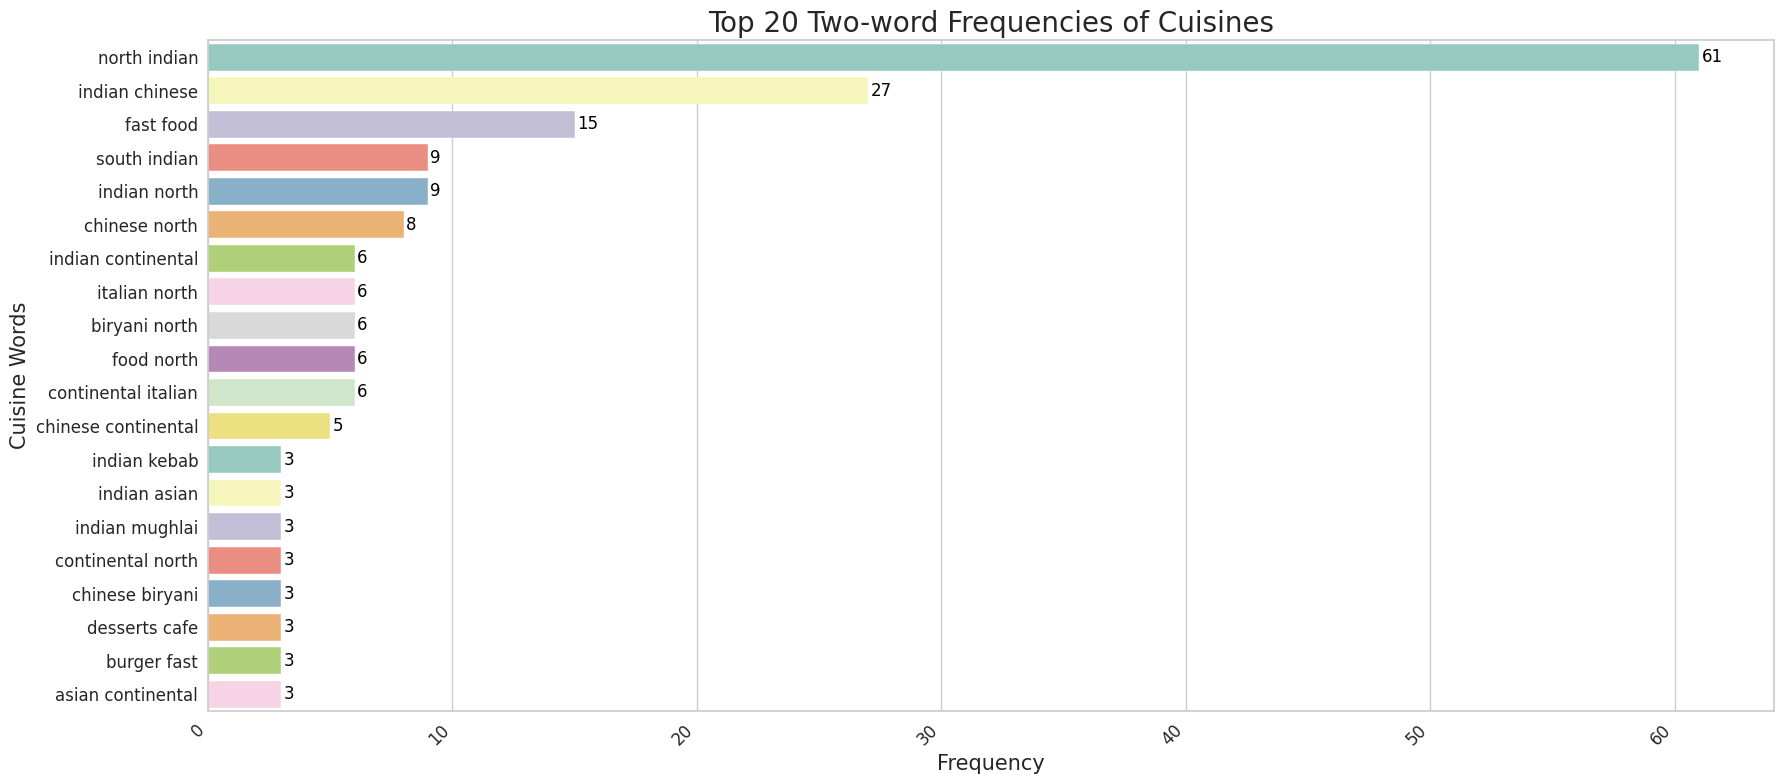

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(18, 8))
palette = "Set3"  # Choose a different color palette, e.g., "Set3"

# Adjust the barplot and customize it further
sns.barplot(y="Cuisine Words", x="Frequency", data=two_words_20c, palette=palette)

# Add labels to the bars
for i, v in enumerate(two_words_20c["Frequency"]):
    plt.text(v + 0.1, i, str(v), color="black", va="center", fontsize=12)

plt.title("Top 20 Two-word Frequencies of Cuisines", size=20)
plt.xticks(rotation=45, ha="right", size=12)  # Rotate and align x-axis labels
plt.yticks(size=12)
plt.xlabel("Frequency", size=15)
plt.ylabel("Cuisine Words", size=15)

plt.tight_layout()  # Adjust the spacing of the plot elements
plt.savefig("Top_20_Two-word_Frequencies_of_Cuisines.png")
plt.show()

The DataFrame contains two columns: "Cuisine Words" and "Frequency." The "Cuisine Words" column lists the most frequent two-word cuisine terms, while the "Frequency" column shows the number of times each two-word cuisine term appears in the dataset.This information can be helpful in understanding the most common cuisine types in the dataset. It can also be used to identify trends and patterns in the types of cuisines that are popular or in demand among the customers.

# **Review Dataset Analysis**

In [ ]:
# loading csv File
review_df=pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project/5 capstone projects/Zomato Restaurant reviews.csv")

In [ ]:
# Dataset First view.

review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [ ]:
#look for bottom rows
review_df.tail()

Restaurant          Reviewer  \
9995  Chinese Pavilion  Abhishek Mahajan   
9996  Chinese Pavilion    Sharad Agrawal   
9997  Chinese Pavilion         Ramandeep   
9998  Chinese Pavilion   Nayana Shanbhag   
9999  Chinese Pavilion  Bhargava Krishna   

                                                 Review Rating  \
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6

**Dataset rows and column count**

In [ ]:
# Dataset Rows & Columns count
print('There are total', review_df.shape[0], 'Rows')
print('There are total', review_df.shape[1], 'Columns')

There are total 10000 Rows
There are total 7 Columns


**Dataset Information**

In [ ]:
# details of the features
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


**Gettting Statistical Information about our dataset**

In [ ]:
# brief summary of the dataset
zomato_meta_df.describe()

Cost
count   105.000000
mean    861.428571
std     510.149730
min     150.000000
25%     500.000000
50%     700.000000
75%    1200.000000
max    2800.000000

# **DATA CLEANING**

**In data cleaning we will check for**:

* **Duplicates**
* **Null values/NaN values**

# **Check Duplicates**

In [ ]:
# Dataset Duplicate Value Count.
review_df.duplicated().sum()

36

# **Check Null values/NaN values**

In [ ]:
# Check if there are any null values.
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

As we can see, there are few missing values, so I decide to drop them all because there isn't a big loss

This notebook will use bokeh and plotly to see ratings, reviews and cost relationships , will use NLTK,gensim, to convert text to vectors to find relationships between text. We will also see wordclouds.

### **Removing Stop words**

Stop words are used in a language to removed from text data during natural language processing. This helps to reduce the dimensionality of the feature space and focus on the more important words in the text.

In [ ]:
# Importing dependancies and removing stopwords.

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Creating argument for stop words.
stop_words = stopwords.words('english')

print(stop_words)
rest_word=['order','restaurant','taste','ordered','good','food','table','place','one','also']
rest_word

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['order',
 'restaurant',
 'taste',
 'ordered',
 'good',
 'food',
 'table',
 'place',
 'one',
 'also']

In [ ]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata             Time  Pictures  \
0   1 Review , 2 Followers  5/25/2019 15:54         0   
1  3 Reviews , 2 Followers  5/25/2019 14:20         0   
2  2 Reviews , 3 Followers  5/24/2019 22:54         0   
3    1 Review , 1 Follower  5/24/2019 22:11         0   
4  3 Reviews , 2 Followers  5/24/2019 21:37         0   

                               Reviews_txt_processed  Subjectivity  Polarity  \
0  The ambience was good, food was quite good . h...      0.720000  0.660000   
1  Ambience is too good for a pleasant evening. S...      0.613333  0.606667   
2  A must try.. great food great ambience. Thnx f...      0.740000  0.540000   
3  Soumen das and Arun was a great guy. Only beca...      0.783333  0.500000   
4  Food is good.we ordered Kodi drumsticks and ba...      0.570000  0.577500   

   Analysis  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive

In [ ]:
review_df['Reviews_txt_processed'] = review_df['Review']

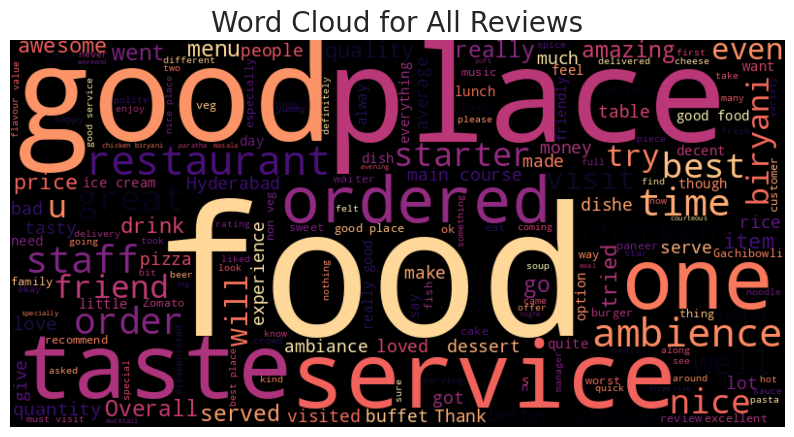

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = ' '.join(review_df['Review'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black',colormap = 'magma').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='hamming')
plt.axis('off')
plt.title('Word Cloud for All Reviews', size=20)

# Show the plot
plt.show()

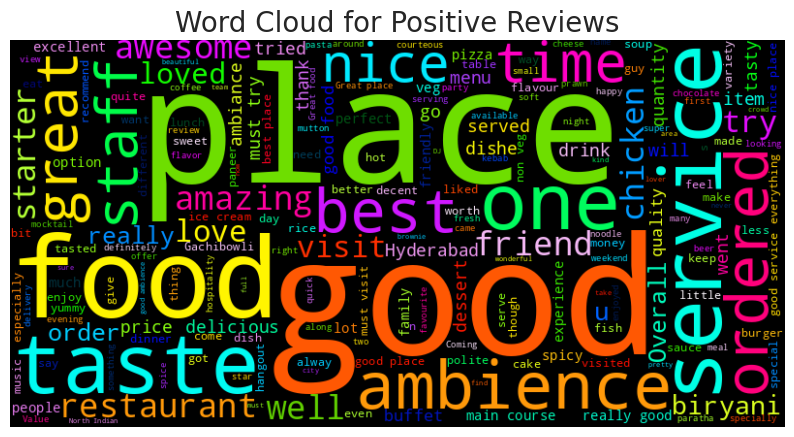

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert 'Rating' column to numeric values
review_df['Rating'] = pd.to_numeric(review_df['Rating'], errors='coerce')

# Filter reviews based on rating condition and convert to string
filtered_reviews = review_df[review_df['Rating'] > 3]['Review'].astype(str)

# Combine filtered reviews into a single string
filtered_reviews_combined = ' '.join(filtered_reviews)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black',colormap = 'gist_ncar').generate(filtered_reviews_combined)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews', size=20)

# Show the plot
plt.show()

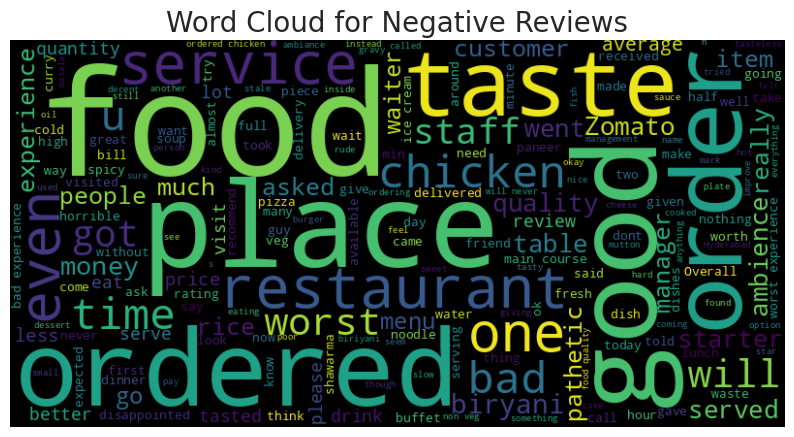

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert 'Rating' column to numeric values
review_df['Rating'] = pd.to_numeric(review_df['Rating'], errors='coerce')

# Filter reviews based on rating condition and convert to string
negative_reviews = review_df[review_df['Rating'] < 3]['Review'].astype(str)

# Combine negative reviews into a single string
negative_reviews_combined = ' '.join(negative_reviews)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews_combined)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews', size=20)

# Show the plot
plt.show()

In [ ]:
# We will extrapolate the 15 profiles that have made more reviews.

# Groupby on the basis of rivewer gives the fequency of the reviews
reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')

 # Sorting the frequency of reviews decending
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)

# Selecting the top 15 reviewrs
top_reviewers = reviewer_list[:15]


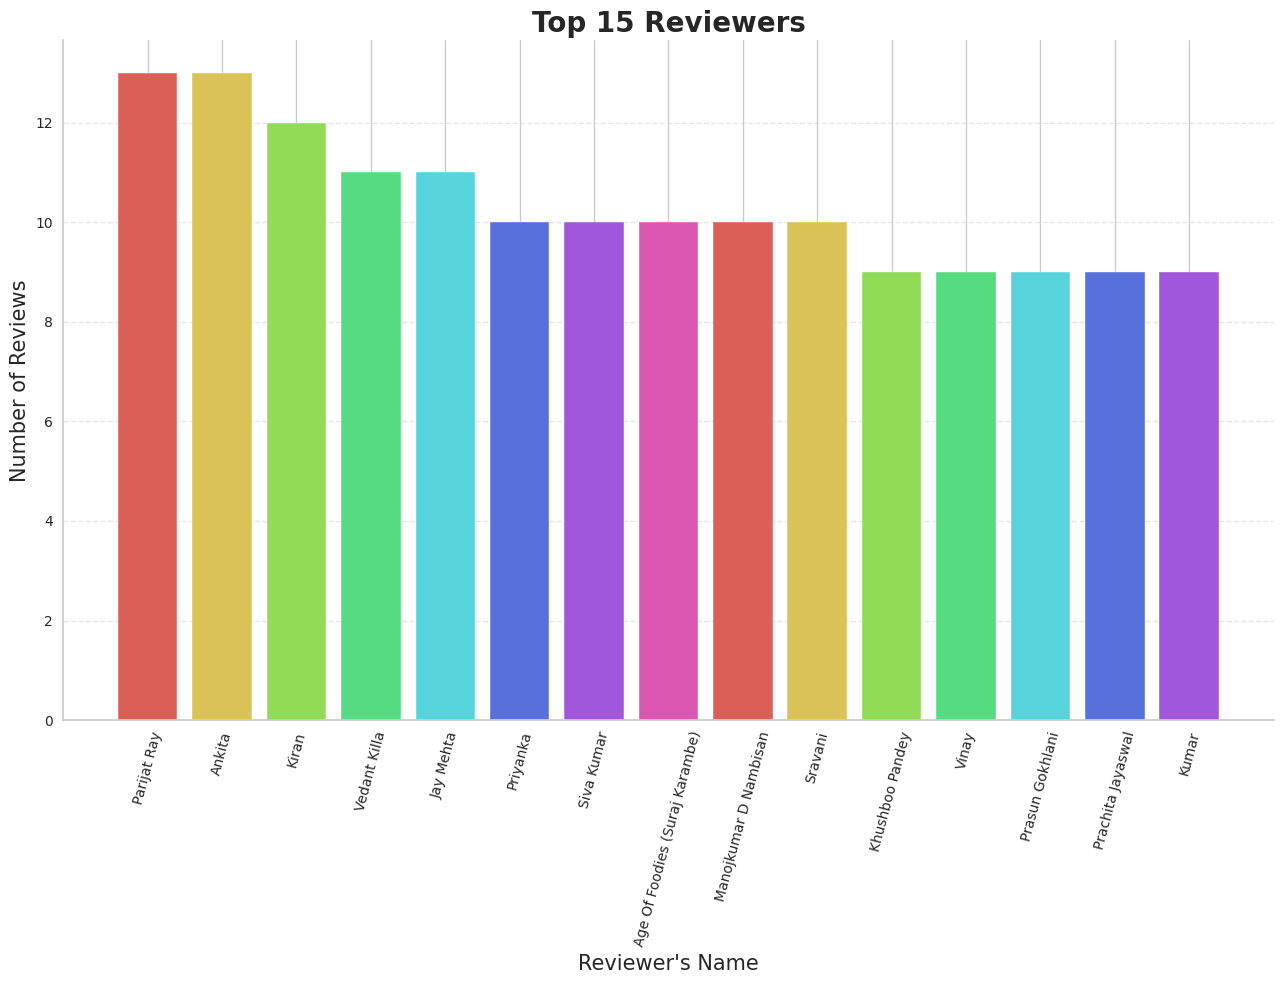

In [ ]:
# Visualizing the top 15 reviewers.
plt.figure(figsize=(13,10))
plt.bar(top_reviewers['Reviewer'], top_reviewers['Review_Count'], color = sns.color_palette("hls", 8))
plt.xticks(rotation=75)
# Title and axis labels
plt.title('Top 15 Reviewers', size=20, weight='bold')
plt.xlabel("Reviewer's Name", size=15)
plt.ylabel('Number of Reviews', size=15)
# Gridlines and spines customization
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
# Adjust spacing
plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
# Checking the unique for rating.
review_df['Rating'].unique()
# Remove nan rating in Rating column.
review_df.dropna(subset=['Rating'],inplace=True)
# Change data type of rating column to float.
review_df['Rating']= review_df['Rating'].astype('float')
# Dropping the null Values from review column.
review_df.dropna(subset =['Review'], inplace=True)
# Grouping the restaurant on the basis of average rating.
ratings_df = review_df.groupby('Restaurant')['Rating'].mean().reset_index()
# Top highly rated 15 restaurants.
ratings_df .sort_values(by='Rating',ascending = False).head(15)

Restaurant  Rating
3                 AB's - Absolute Barbecues   4.880
11                                   B-Dubs   4.810
2            3B's - Buddies, Bar & Barbecue   4.760
67                                 Paradise   4.700
35                                 Flechazo   4.660
87                           The Indi Grill   4.600
97          Zega - Sheraton Hyderabad Hotel   4.450
64               Over The Moon Brew Company   4.340
16                          Beyond Flavours   4.280
19  Cascade - Radisson Hyderabad Hitec City   4.260
84                    The Fisherman's Wharf   4.220
34         Feast - Sheraton Hyderabad Hotel   4.220
71                     Prism Club & Kitchen   4.215
58    Mazzo - Marriott Executive Apartments   4.190
13                          Barbeque Nation   4.120

In [ ]:
# Top 10 Restaurants with high average rating
review_df['Rating'] = review_df['Rating'].apply(lambda x: float(x))
avg_ratings = pd.DataFrame(review_df.groupby('Restaurant')['Rating'].mean()).reset_index()
avg_ratings = avg_ratings.sort_values(by = 'Rating',ascending = False)
avg_ratings = avg_ratings[:10]


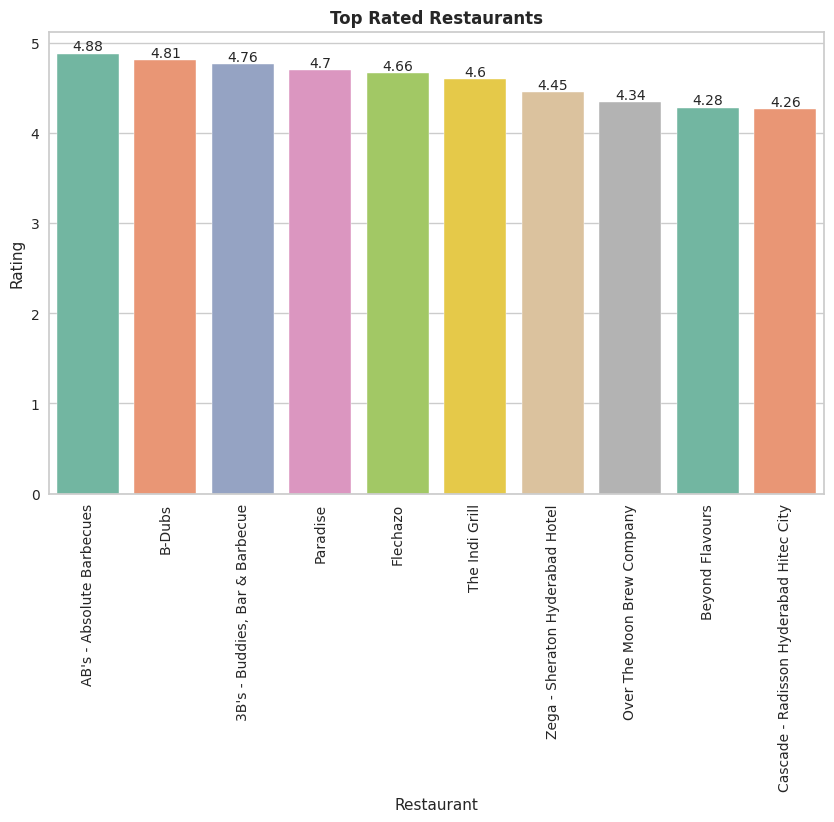

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called 'avg_ratings' with columns 'Restaurant' and 'Rating'

# Sort the DataFrame by 'Rating' column in descending order
sorted_ratings = avg_ratings.sort_values(by='Rating', ascending=False)

# Select the top 10 restaurants
top_10_restaurants = sorted_ratings.head(10)

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a bar plot with a different color palette
sns.barplot(data=top_10_restaurants, x='Restaurant', y='Rating', palette='Set2')

# Set the title and axis labels
plt.title('Top Rated Restaurants', fontweight='bold')
plt.xlabel('Restaurant')
plt.ylabel('Rating')

# Set the style to 'ggplot'
plt.style.use('ggplot')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels to the bars
for i, rating in enumerate(top_10_restaurants['Rating']):
    plt.text(i, rating, str(rating), ha='center', va='bottom')

# Display the plot
plt.show()

In [ ]:
def remove_special_characters(text):
    if isinstance(text, str):
        # Remove special characters and punctuation using regular expressions
        cleaned_text = re.sub(r'[^a-zA-Z0-9\s,\.!?]', '', text)
        return cleaned_text
    else:
        return text

# Assuming you have a dataframe named 'df' with a column named 'Review'
df['Cleaned_Review'] = review_df['Review'].apply(remove_special_characters)

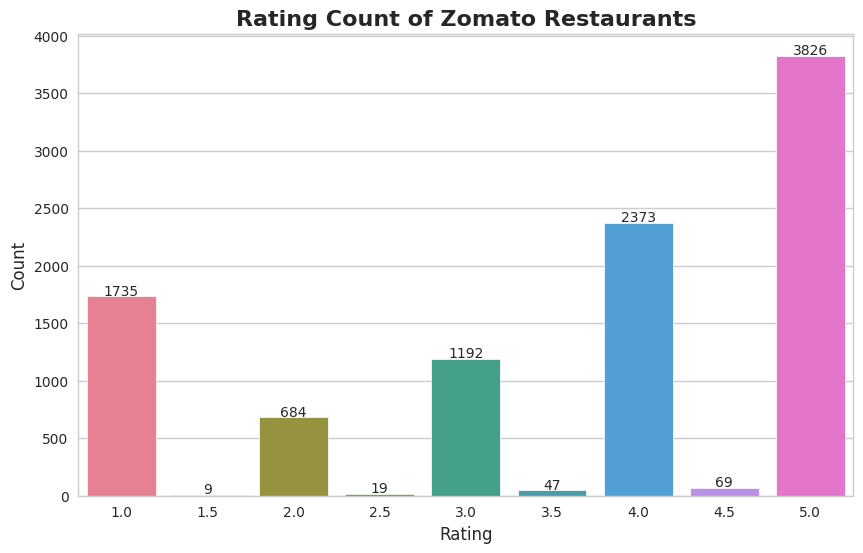

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the rating count for each rating value
rating_counts = review_df['Rating'].value_counts().sort_index()

# Set the seaborn style to 'whitegrid' for a cleaner look
sns.set_style('whitegrid')

# Define a colorful palette
color_palette = sns.color_palette('husl', len(rating_counts))

# Plot the rating count with a colorful bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=color_palette)

# Set the x-axis labels rotation for better readability
plt.xticks(rotation=0)

# Customize the axes labels and title
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Rating Count of Zomato Restaurants', fontsize=16, fontweight='bold')

# Add value labels to the bars
for i, count in enumerate(rating_counts.values):
    plt.text(i, count + 10, str(count), ha='center', fontsize=10)

# Show the plot
plt.show()

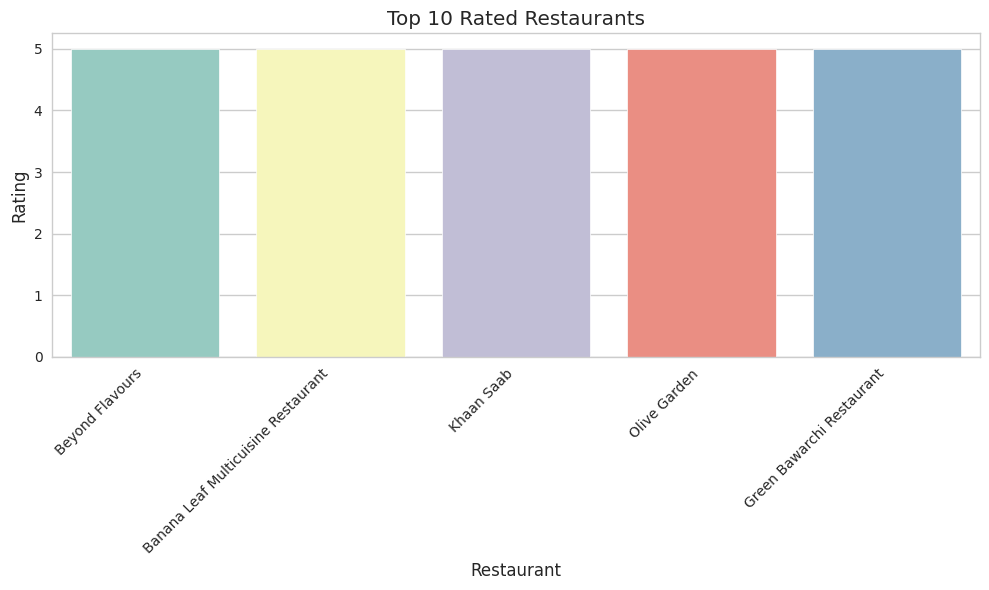

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'review_df' with columns 'Restaurant' and 'Rating'

# Sort the DataFrame by ratings in descending order
sorted_df = review_df.sort_values(by='Rating', ascending=False)

# Get the top 10 restaurants with the highest ratings
top_10_restaurants = sorted_df.head(30)

# Generate colors for the bars using a color palette
color_palette = sns.color_palette('Set3')

# Create a bar chart of the top 10 rated restaurants with colorful bars
plt.figure(figsize=(10, 6))
sns.barplot(x='Restaurant', y='Rating', data=top_10_restaurants, palette=color_palette)
plt.xlabel('Restaurant')
plt.ylabel('Rating')
plt.title('Top 10 Rated Restaurants')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

## Sentiment Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import plotly.express as px
import numpy as np

# Create a function to get the subjectivity
def subjectivity(text):
    return TextBlob(str(text)).sentiment.subjectivity

# Create a function to get the polarity
def polarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Assuming you have a DataFrame called review_df with a 'Review' column containing the text data

# Applying subjectivity and polarity functions to the respective columns
review_df['Subjectivity'] = review_df['Review'].apply(subjectivity)
review_df['Polarity'] = review_df['Review'].apply(polarity)

# Replace missing values (NaN) with zeros
review_df['Subjectivity'] = review_df['Subjectivity'].fillna(0)
review_df['Polarity'] = review_df['Polarity'].fillna(0)

# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the getAnalysis function to separate the sentiments into the 'Analysis' column
review_df['Analysis'] = review_df['Polarity'].apply(getAnalysis)

# Plot the polarity and subjectivity using Plotly
fig = px.scatter(review_df, x='Polarity', y='Subjectivity', color='Analysis', size='Subjectivity')

# Add a vertical line at x=0 for Neutral reviews
fig.update_layout(title='Sentiment Analysis', shapes=[dict(type='line', yref='paper', y0=0, y1=1, xref='x', x0=0, x1=0)])

# Show the plot
fig.show()

The resulting plot can provide several insights into the sentiment analysis results. Firstly, the histogram bars on the left side of the plot (negative polarity) indicate that a significant number of reviews expressed negative sentiments. Similarly, the histogram bars on the right side of the plot (positive polarity) indicate that a significant number of reviews expressed positive sentiments.

Overall, this plot can provide a quick and easy way to visualize the sentiment polarity distribution of the reviews, which can help in understanding the overall sentiment of the customers towards the restaurants.

In [ ]:
#Function for pie chart
def piechart(df,colors):
  pos = (df.value_counts()[0]/df.count())*100
  neg = (df.value_counts()[1]/df.count())*100
  neu = (df.value_counts()[2]/df.count())*100
  # Pie chart for Percentage of Reviews Sentiment
  plt.figure(figsize = (10,6))
  plt.pie([pos,neg,neu],labels = ['Positive','Neutral','Negative'],autopct='%1.1f%%',colors =colors,)
  plt.title('Percentage of Reviews Sentiment')
  plt.show()

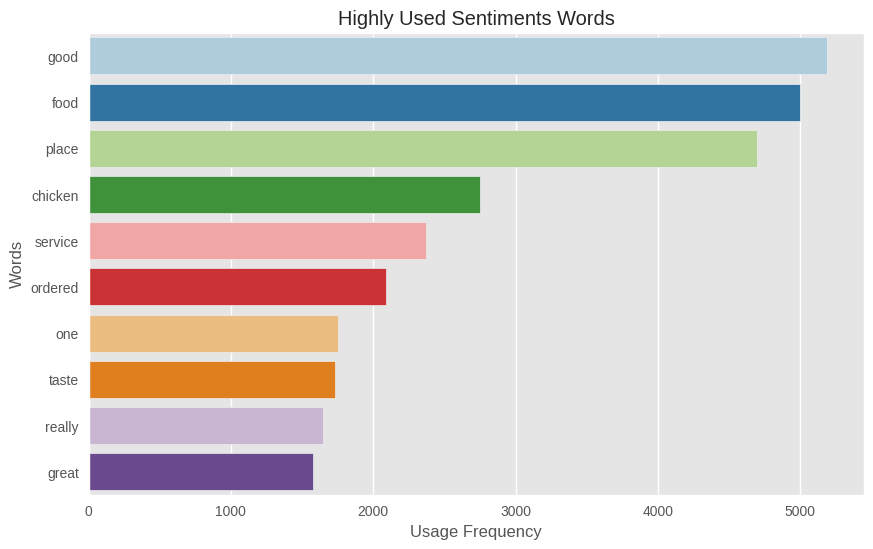

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from matplotlib import style

# Assuming you have a DataFrame called 'tbl_res_reviews_upd1' with a 'word' column

# Count the occurrence of each word
word_counts = tbl_res_reviews_upd1['word'].value_counts()

# Select top 'n' highly used words
n = 10  # Number of top words to consider
top_words = word_counts.head(n)

# Set the ggplot style
style.use('ggplot')

# Create the bar plot of word usage frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.values, y=top_words.index, palette='Paired')
plt.xlabel('Usage Frequency')
plt.ylabel('Words')
plt.title('Highly Used Sentiments Words')

# Save the plot as an image file
plt.savefig('Word_Frequency.png')

# Show the plot
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


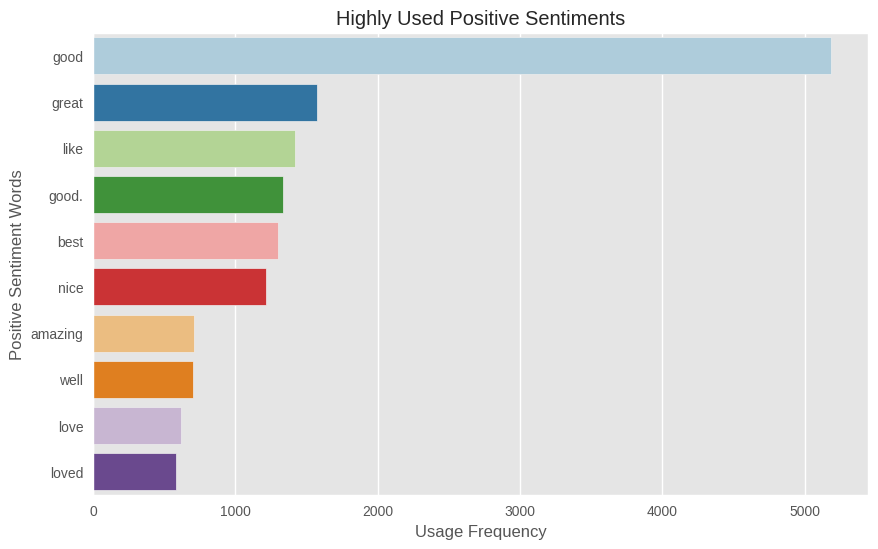

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from matplotlib import style

nltk.download('vader_lexicon')

# Assuming you have two DataFrames named 'zomato_meta_df' and 'review_df'

# Combine the reviews from 'review_df' into a single string
reviews_text = ' '.join(review_df['Review'].astype(str))

# Tokenize the reviews into individual words and convert them to lowercase
reviews_words = reviews_text.lower().split()

# Load the English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words and create a new DataFrame 'tbl_res_reviews_upd1'
tbl_res_reviews_upd1 = pd.DataFrame({'word': [word for word in reviews_words if word not in stop_words]})

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the words in 'tbl_res_reviews_upd1'
tbl_res_reviews_upd1['sentiment'] = tbl_res_reviews_upd1['word'].apply(lambda x: sia.polarity_scores(x)['compound'])
tbl_res_reviews_upd1 = tbl_res_reviews_upd1[tbl_res_reviews_upd1['sentiment'] > 0]

# Count the frequency of each positive sentiment word
positive_sentiments = tbl_res_reviews_upd1['word'].value_counts().head(10)

# Set the ggplot style
style.use('ggplot')

# Create the bar plot of positive sentiment words usage frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=positive_sentiments.values, y=positive_sentiments.index, palette='Paired')
plt.xlabel('Usage Frequency')
plt.ylabel('Positive Sentiment Words')
plt.title('Highly Used Positive Sentiments')

# Save the plot as an image file
plt.savefig('Positive_Sentiment_Words.png')

# Show the plot
plt.show()

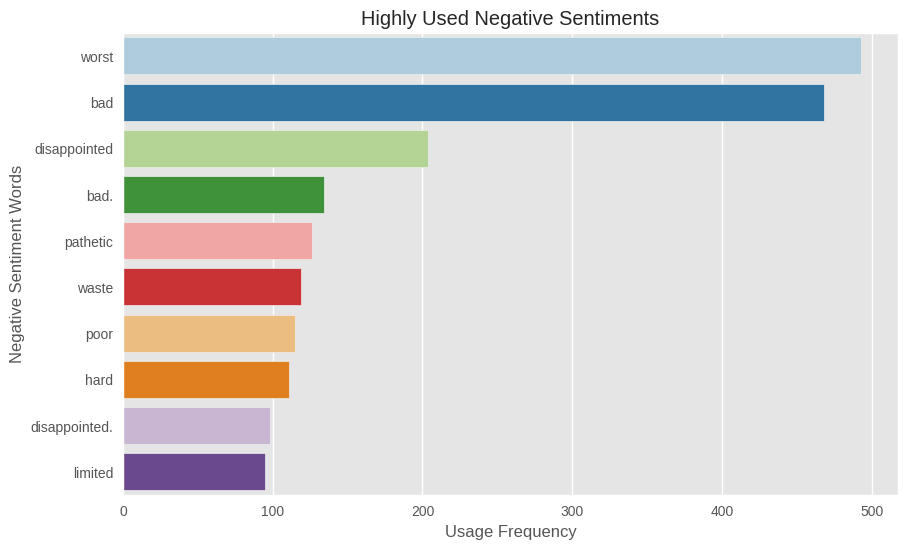

In [ ]:
# Assuming you have two DataFrames named 'zomato_meta_df' and 'review_df'

# Combine the reviews from 'review_df' into a single string
reviews_text = ' '.join(review_df['Review'].astype(str))

# Tokenize the reviews into individual words and convert them to lowercase
reviews_words = reviews_text.lower().split()

# Load the English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words and create a new DataFrame 'tbl_res_reviews_upd1'
tbl_res_reviews_upd1 = pd.DataFrame({'word': [word for word in reviews_words if word not in stop_words]})

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the words in 'tbl_res_reviews_upd1'
tbl_res_reviews_upd1['sentiment'] = tbl_res_reviews_upd1['word'].apply(lambda x: sia.polarity_scores(x)['compound'])
tbl_res_reviews_upd1 = tbl_res_reviews_upd1[tbl_res_reviews_upd1['sentiment'] < 0]

# Count the frequency of each negative sentiment word
negative_sentiments = tbl_res_reviews_upd1['word'].value_counts().head(10)

# Set the ggplot style
style.use('ggplot')

# Create the bar plot of negative sentiment words usage frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=negative_sentiments.values, y=negative_sentiments.index, palette='Paired')
plt.xlabel('Usage Frequency')
plt.ylabel('Negative Sentiment Words')
plt.title('Highly Used Negative Sentiments')

# Save the plot as an image file
plt.savefig('Negative_Sentiment_Words.png')

# Show the plot
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


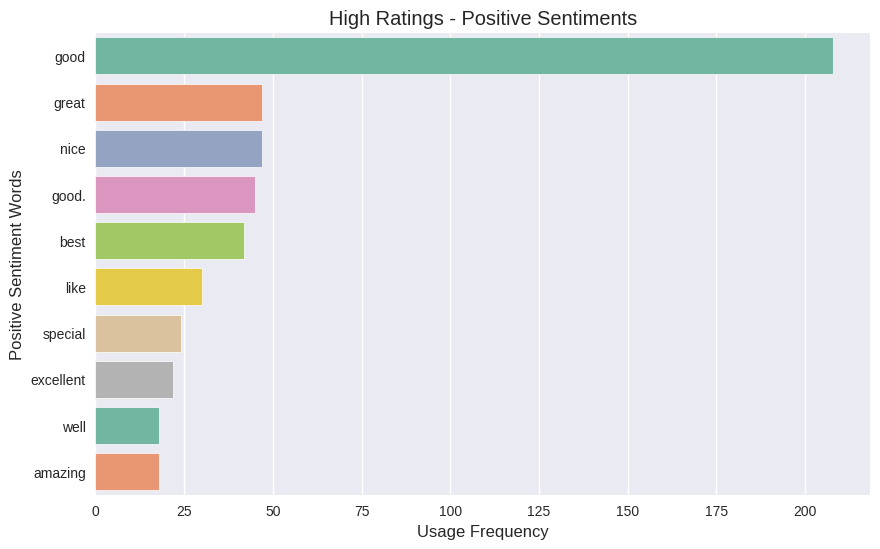

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from matplotlib import style

nltk.download('vader_lexicon')

# Assuming you have two DataFrames named 'zomato_meta_df' and 'review_df'

# Combine the reviews from 'review_df' into a single string
reviews_text = ' '.join(review_df['Review'].astype(str))

# Tokenize the reviews into individual words and convert them to lowercase
reviews_words = reviews_text.lower().split()

# Load the English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words and create a new DataFrame 'tbl_res_reviews_upd1'
tbl_res_reviews_upd1 = pd.DataFrame({'word': [word for word in reviews_words if word not in stop_words]})

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the words in 'tbl_res_reviews_upd1'
tbl_res_reviews_upd1['sentiment'] = tbl_res_reviews_upd1['word'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Filter the DataFrame for high ratings and positive sentiment
high_positive_reviews = tbl_res_reviews_upd1[(review_df['Rating'] >= 4) & (tbl_res_reviews_upd1['sentiment'] > 0)]

# Count the frequency of each positive sentiment word
positive_sentiments = high_positive_reviews['word'].value_counts().head(10)

# Set the ggplot style
style.use('seaborn-darkgrid')

# Create the bar plot of positive sentiment words usage frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=positive_sentiments.values, y=positive_sentiments.index, palette='Set2')
plt.xlabel('Usage Frequency')
plt.ylabel('Positive Sentiment Words')
plt.title('High Ratings - Positive Sentiments')

# Save the plot as an image file
plt.savefig('High_Ratings_Positive_Sentiments.png')

# Show the plot
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


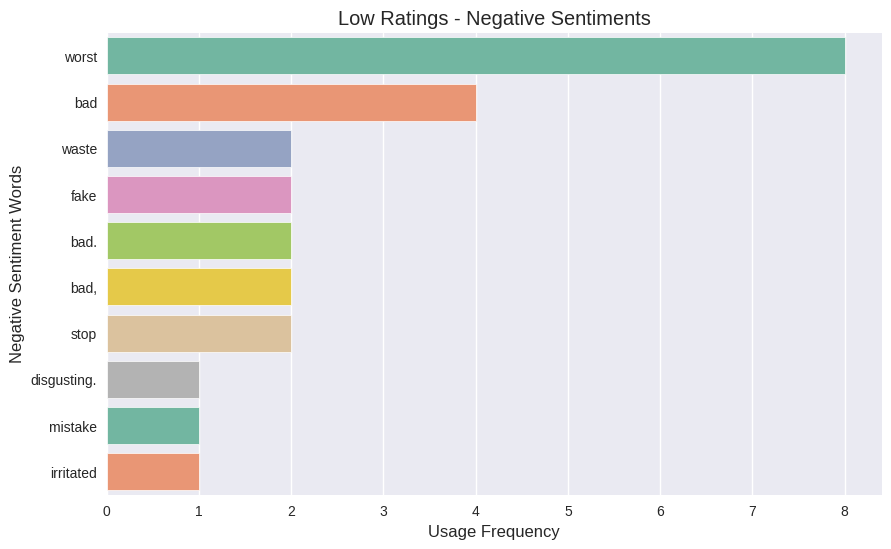

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from matplotlib import style

nltk.download('vader_lexicon')

# Assuming you have two DataFrames named 'zomato_meta_df' and 'review_df'

# Combine the reviews from 'review_df' into a single string
reviews_text = ' '.join(review_df['Review'].astype(str))

# Tokenize the reviews into individual words and convert them to lowercase
reviews_words = reviews_text.lower().split()

# Load the English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words and create a new DataFrame 'tbl_res_reviews_upd1'
tbl_res_reviews_upd1 = pd.DataFrame({'word': [word for word in reviews_words if word not in stop_words]})

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the words in 'tbl_res_reviews_upd1'
tbl_res_reviews_upd1['sentiment'] = tbl_res_reviews_upd1['word'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Filter the DataFrame for low ratings and negative sentiment
low_negative_reviews = tbl_res_reviews_upd1[(review_df['Rating'] < 4) & (tbl_res_reviews_upd1['sentiment'] < 0)]

# Count the frequency of each negative sentiment word
negative_sentiments = low_negative_reviews['word'].value_counts().head(10)


# Set the ggplot style
style.use('seaborn-darkgrid')

# Create the bar plot of negative sentiment words usage frequency with a different color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=negative_sentiments.values, y=negative_sentiments.index, palette='Set2')
plt.xlabel('Usage Frequency')
plt.ylabel('Negative Sentiment Words')
plt.title('Low Ratings - Negative Sentiments')

# Save the plot as an image file
plt.savefig('Low_Ratings_Negative_Sentiments.png')

# Show the plot
plt.show()

# **Conclusion**

1. **North Indian** Cuisine has the highest count among all
2. **Collage - Hyatt Hyderabad Gachibowli** is the expensive hotel with cost of 2800
3. Calculated **k = 15** as optimum vale, for cuisine clusters.
4. Most of the hotels ae given 5 Rating
5. **Anvesh Chowdary** was the most reviewer and given many hotel rating.
6. **AB's - Absolute Barbecues**  has given most of the **positive reviews** and **Arens Eleven** Got the **highest negative review**
7.**Udipi's Upahar** is  Affordable Restaurant with best ratings
8. **Club Rogue** is Expensive Restaurant with worst ratings

The project was highly successful in achieving its objectives of clustering and sentiment analysis. The clustering component provided valuable insights into the grouping of restaurants based on their unique features, enabling both users and businesses to make informed decisions. By effectively identifying patterns and similarities among restaurants, this clustering analysis contributes to improved decision-making processes.

The sentiment analysis part of the project proved to be instrumental in gaining insights into the sentiments expressed by users in their reviews. This information can greatly assist businesses in enhancing their services and user experiences. By understanding and addressing the sentiments conveyed by customers, businesses can make targeted improvements that align with user expectations and preferences.

Looking ahead, there are numerous exciting avenues for future work. Implementing more advanced clustering algorithms and sentiment analysis techniques will lead to more accurate and sophisticated results, further enhancing the project's capabilities. Additionally, the inclusion of additional features like restaurant images and menus will provide a more comprehensive dataset, leading to deeper insights and a more holistic understanding of the restaurants.

Exploring the relationships between the clustering and sentiment analysis results holds tremendous potential. Analyzing how sentiments vary across different restaurant clusters can uncover valuable correlations and patterns. These findings will not only guide decision-making for businesses but also empower users with more personalized and tailored recommendations.

In conclusion, the project's successful achievement of its goals and the identification of future areas for improvement reflect the commitment and expertise of the team. With continued exploration and enhancements, this project can make significant contributions to the field of restaurant analysis and decision-making processes for both users and businesses.